In [1]:
!nvidia-smi ## só para checar a gpu do cluster

Fri Nov  1 22:15:27 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3090        Off |   00000000:01:00.0 Off |                  N/A |
| 37%   29C    P8             37W /  370W |      78MiB /  24576MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install seaborn
!pip install matplotlib

In [3]:
!pip install numpy

In [4]:
!pip install pyarrow ### precisa do pyarrow para converter do polars para pandas para usar o seaborn e o matplotlib

In [5]:
!pip install polars

In [6]:
import polars as pl
import numpy as np

In [7]:
ls

 CIC-DDoS2019_prepared.csv
 contagem_labels.png
 correlation_heatmap_after_removal.png
 correlation_heatmap_hd_filtered.png
 correlation_heatmap_hd.png
 cse-cic-ids2018-final.csv*
 decision_tree_is_attack.png
 EDA-CICIDS-Copy1.ipynb
 EDA-CICIDS.ipynb
 final_NC_pearson_correlation_heatmap_hd.png
 final_NC_spearman_correlation_heatmap_hd.png
 pearson_correlation_heatmap_final.png
 pearson_correlation_heatmap_hd.png
 spearman_correlation_heatmap_final.png
 spearman_correlation_heatmap_hd.png
 subdataset_Benign.csv
'subdataset_Brute Force -Web.csv'
'subdataset_Brute Force -XSS.csv'
'subdataset_DDOS attack-HOIC.csv'
'subdataset_DoS attacks-GoldenEye.csv'
'subdataset_DoS attacks-Hulk.csv'
'subdataset_DoS attacks-SlowHTTPTest.csv'
'subdataset_DoS attacks-Slowloris.csv'
 subdataset_FTP-BruteForce.csv
 subdataset_Infilteration.csv
'subdataset_SQL Injection.csv'
 subdataset_SSH-Bruteforce.csv
 xgboost_model.json


In [8]:
cse = pl.read_csv("cse-cic-ids2018-final.csv")
cse

shape: (7_189_487, 80)
┌──────────┬──────────┬───────────────┬─────────┬───┬──────────┬──────────┬────────┬────────────┐
│ Dst Port ┆ Protocol ┆ Flow Duration ┆ Tot Fwd ┆ … ┆ Idle Max ┆ Idle Min ┆ Label  ┆ timestamp  │
│ ---      ┆ ---      ┆ ---           ┆ Pkts    ┆   ┆ ---      ┆ ---      ┆ ---    ┆ ---        │
│ i64      ┆ i64      ┆ i64           ┆ ---     ┆   ┆ i64      ┆ i64      ┆ str    ┆ str        │
│          ┆          ┆               ┆ i64     ┆   ┆          ┆          ┆        ┆            │
╞══════════╪══════════╪═══════════════╪═════════╪═══╪══════════╪══════════╪════════╪════════════╡
│ 0        ┆ 0        ┆ 112641719     ┆ 3       ┆ … ┆ 56320958 ┆ 56320761 ┆ Benign ┆ 2018-02-14 │
│          ┆          ┆               ┆         ┆   ┆          ┆          ┆        ┆ 08:31:01   │
│ 0        ┆ 0        ┆ 112641466     ┆ 3       ┆ … ┆ 56320814 ┆ 56320652 ┆ Benign ┆ 2018-02-14 │
│          ┆          ┆               ┆         ┆   ┆          ┆          ┆        ┆ 08:33:50   │
│ 0        ┆ 0        ┆ 112638623     ┆ 3       ┆ … ┆ 56319525 ┆ 56319098 ┆ Benign ┆ 2018-02-14 │
│          ┆          ┆               ┆         ┆   ┆          ┆          ┆        ┆ 08:36:39   │
│ 22       ┆ 6        ┆ 6453966       ┆ 15      ┆ … ┆ 0        ┆ 0        ┆ Benign ┆ 2018-02-14 │
│          ┆          ┆               ┆         ┆   ┆          ┆          ┆        ┆ 08:40:13   │
│ 22       ┆ 6        ┆ 8804066       ┆ 14      ┆ … ┆ 0        ┆ 0        ┆ Benign ┆ 2018-02-14 │
│          ┆          ┆               ┆         ┆   ┆          ┆          ┆        ┆ 08:40:23   │
│ …        ┆ …        ┆ …             ┆ …       ┆ … ┆ …        ┆ …        ┆ …      ┆ …          │
│ 0        ┆ 0        ┆ 118494070     ┆ 31      ┆ … ┆ 0        ┆ 0        ┆ Benign ┆ 2018-03-01 │
│          ┆          ┆               ┆         ┆   ┆          ┆          ┆        ┆ 12:59:55   │
│ 2634     ┆ 6        ┆ 114340        ┆ 2       ┆ … ┆ 0        ┆ 0        ┆ Benign ┆ 2018-03-01 │
│          ┆          ┆               ┆         ┆   ┆          ┆          ┆        ┆ 12:59:56   │
│ 3389     ┆ 6        ┆ 1404866       ┆ 8       ┆ … ┆ 0        ┆ 0        ┆ Benign ┆ 2018-03-01 │
│          ┆          ┆               ┆         ┆   ┆          ┆          ┆        ┆ 12:59:57   │
│ 3389     ┆ 6        ┆ 3966663       ┆ 14      ┆ … ┆ 0        ┆ 0        ┆ Benign ┆ 2018-03-01 │
│          ┆          ┆               ┆         ┆   ┆          ┆          ┆        ┆ 12:59:58   │
│ 53092    ┆ 6        ┆ 86637706      ┆ 2       ┆ … ┆ 86600000 ┆ 86600000 ┆ Benign ┆ 2018-03-01 │
│          ┆          ┆               ┆         ┆   ┆          ┆          ┆        ┆ 12:59:58   │
└──────────┴──────────┴───────────────┴─────────┴───┴──────────┴──────────┴────────┴────────────┘

# Pré-processamento

In [9]:
colunas_antes = cse.columns
print("Colunas antes da remoção:", colunas_antes)

Colunas antes da remoção: ['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate 

## Remover colunas com valores constantes

In [10]:
cse = cse.drop_nulls()

In [12]:
cse = cse.drop([col for col in cse.columns if cse.select(col).n_unique() == 1])

## Remover valores infinitos

### identificar colunas numéricas com valores infinitos

In [13]:
numeric_cols = [
    pl.col(col).is_infinite() for col in cse.columns if cse.schema[col] in [pl.Float32, pl.Float64]
]

### Reduzir para um filtro único para linhas sem valores infinitos

In [14]:
from functools import reduce

if numeric_cols:
    infinite_filter = reduce(lambda acc, col: acc | col, numeric_cols)
    cse = cse.filter(~infinite_filter)

### Retirando colunas desnecessárias

In [15]:
#cse = cse.drop("timestamp") #vamos utilizar em series temporais

### Comparação antes e dps

In [16]:
colunas_depois = cse.columns
print(colunas_depois)

['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts', 'Init Fwd Win Byts', 'Init Bwd

In [17]:
print(cse.shape)

(7189487, 72)


In [18]:
colunas_removidas = set(colunas_antes) - set(colunas_depois)
print(colunas_removidas)

{'Bwd PSH Flags', 'Bwd URG Flags', 'Bwd Pkts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Fwd Byts/b Avg'}


## Conclusão

A diminuição do shape indica que 9 colunas foram removidas do dataset original, sendo elas: ''Fwd Byts/b Avg', 'Bwd PSH Flags', 'Bwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Fwd Blk Rate Avg', 'Bwd Pkts/b Avg', 'Bwd URG Flags'.

Essas colunas foram eliminadas devido à presença de valores únicos ou infinitos, o que poderia impactar negativamente a modelagem, pois valores constantes não fornecem informação relevante, enquanto valores infinitos podem distorcer os resultados e comprometer a performance dos modelos.

# Transformação

## Exibir os tipos das colunas

In [19]:
tipos_colunas = cse.schema
print(tipos_colunas)

Schema([('Dst Port', Int64), ('Protocol', Int64), ('Flow Duration', Int64), ('Tot Fwd Pkts', Int64), ('Tot Bwd Pkts', Int64), ('TotLen Fwd Pkts', Int64), ('TotLen Bwd Pkts', Int64), ('Fwd Pkt Len Max', Int64), ('Fwd Pkt Len Min', Int64), ('Fwd Pkt Len Mean', Float64), ('Fwd Pkt Len Std', Float64), ('Bwd Pkt Len Max', Int64), ('Bwd Pkt Len Min', Int64), ('Bwd Pkt Len Mean', Float64), ('Bwd Pkt Len Std', Float64), ('Flow Byts/s', Float64), ('Flow Pkts/s', Float64), ('Flow IAT Mean', Float64), ('Flow IAT Std', Float64), ('Flow IAT Max', Int64), ('Flow IAT Min', Int64), ('Fwd IAT Tot', Int64), ('Fwd IAT Mean', Float64), ('Fwd IAT Std', Float64), ('Fwd IAT Max', Int64), ('Fwd IAT Min', Int64), ('Bwd IAT Tot', Int64), ('Bwd IAT Mean', Float64), ('Bwd IAT Std', Float64), ('Bwd IAT Max', Int64), ('Bwd IAT Min', Int64), ('Fwd PSH Flags', Int64), ('Fwd URG Flags', Int64), ('Fwd Header Len', Int64), ('Bwd Header Len', Int64), ('Fwd Pkts/s', Float64), ('Bwd Pkts/s', Float64), ('Pkt Len Min', Int64

### Contar as ocorrências de cada ataque

In [20]:
label_counts = cse['Label'].value_counts()
print(label_counts)

shape: (12, 2)
┌──────────────────────────┬─────────┐
│ Label                    ┆ count   │
│ ---                      ┆ ---     │
│ str                      ┆ u32     │
╞══════════════════════════╪═════════╡
│ FTP-BruteForce           ┆ 193354  │
│ Infilteration            ┆ 160639  │
│ DoS attacks-Slowloris    ┆ 10990   │
│ DoS attacks-SlowHTTPTest ┆ 131706  │
│ DoS attacks-GoldenEye    ┆ 41508   │
│ …                        ┆ …       │
│ Brute Force -Web         ┆ 611     │
│ SSH-Bruteforce           ┆ 187589  │
│ Brute Force -XSS         ┆ 230     │
│ DDOS attack-HOIC         ┆ 684255  │
│ Benign                   ┆ 5316606 │
└──────────────────────────┴─────────┘


### Plotar a distribuição das classes

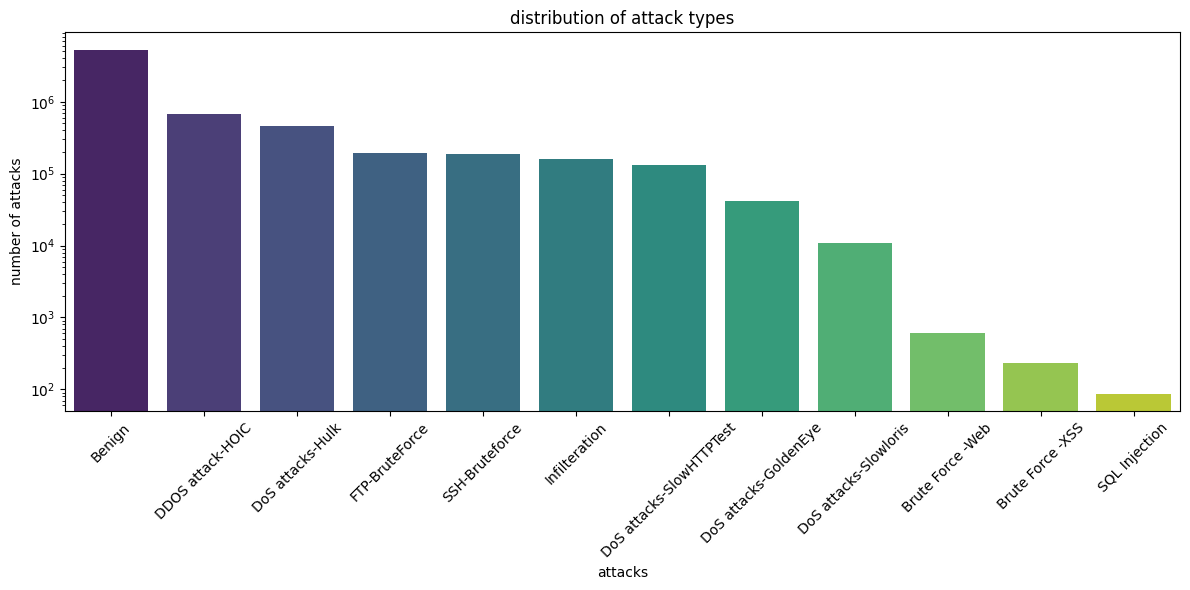

In [21]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cse_pandas = cse.to_pandas()

label_counts = cse_pandas['Label'].value_counts().reset_index()
label_counts.columns = ['Label', 'Count']

plt.figure(figsize=(12, 6))
sns.barplot(
    data=label_counts, 
    x='Label', 
    y='Count', 
    hue='Label', 
    dodge=False, 
    palette="viridis",
    legend=False
)
plt.yscale('log')
plt.title('distribution of attack types')
plt.xlabel('attacks')
plt.ylabel('number of attacks')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('contagem_labels.png', dpi=300)

plt.show()

## Coluna Is_Attack

Uma estratégia possível seria transformar a coluna 'Label' em númerica, mas para preservar a granularidade dos dados, manteremos a coluna label como é e criaremos uma coluna 'Is_Attack' para facilitar a análise

In [22]:
tipos_ataques = cse['Label'].unique().to_list()
print(tipos_ataques)

['SQL Injection', 'DoS attacks-GoldenEye', 'DoS attacks-Hulk', 'FTP-BruteForce', 'Benign', 'DoS attacks-Slowloris', 'Brute Force -Web', 'DDOS attack-HOIC', 'Infilteration', 'DoS attacks-SlowHTTPTest', 'Brute Force -XSS', 'SSH-Bruteforce']


In [23]:
cse = cse.with_columns(
    pl.when(pl.col("Label") == "Benign")
    .then(pl.lit(0))
    .otherwise(pl.lit(1))
    .alias("Is_Attack")
)

print(cse.head())

shape: (5, 73)
┌──────────┬──────────┬───────────┬─────────┬───┬──────────┬────────┬────────────┬───────────┐
│ Dst Port ┆ Protocol ┆ Flow      ┆ Tot Fwd ┆ … ┆ Idle Min ┆ Label  ┆ timestamp  ┆ Is_Attack │
│ ---      ┆ ---      ┆ Duration  ┆ Pkts    ┆   ┆ ---      ┆ ---    ┆ ---        ┆ ---       │
│ i64      ┆ i64      ┆ ---       ┆ ---     ┆   ┆ i64      ┆ str    ┆ str        ┆ i32       │
│          ┆          ┆ i64       ┆ i64     ┆   ┆          ┆        ┆            ┆           │
╞══════════╪══════════╪═══════════╪═════════╪═══╪══════════╪════════╪════════════╪═══════════╡
│ 0        ┆ 0        ┆ 112641719 ┆ 3       ┆ … ┆ 56320761 ┆ Benign ┆ 2018-02-14 ┆ 0         │
│          ┆          ┆           ┆         ┆   ┆          ┆        ┆ 08:31:01   ┆           │
│ 0        ┆ 0        ┆ 112641466 ┆ 3       ┆ … ┆ 56320652 ┆ Benign ┆ 2018-02-14 ┆ 0         │
│          ┆          ┆           ┆         ┆   ┆          ┆        ┆ 08:33:50   ┆           │
│ 0        ┆ 0        ┆ 112638623 ┆

## Transformar colunas categóricas em numéricas

In [24]:
#cse = cse.with_columns(
#    pl.when(pl.col('Label') == 'Benign').then(0)
#      .when(pl.col('Label') == 'SQL Injection').then(1)
#      .when(pl.col('Label') == 'DDOS attack-HOIC').then(2)
#      .when(pl.col('Label') == 'Brute Force -Web').then(3)
#      .when(pl.col('Label') == 'DoS attacks-Slowloris').then(4)
#      .when(pl.col('Label') == 'DoS attacks-SlowHTTPTest').then(5)
#      .when(pl.col('Label') == 'FTP-BruteForce').then(6)
#      .when(pl.col('Label') == 'Brute Force -XSS').then(7)
#      .when(pl.col('Label') == 'DoS attacks-Hulk').then(8)
#      .when(pl.col('Label') == 'DoS attacks-GoldenEye').then(9)
#      .when(pl.col('Label') == 'SSH-Bruteforce').then(10)
#      .when(pl.col('Label') == 'Infilteration').then(11)
#      .otherwise(12)  # valor para categorias nao listadas
#      .alias('Label')
#)
#print(cse.head())

## Normalização de colunas numericas

In [25]:
#numeric_columns = [col for col, dtype in cse.schema.items() if dtype in [pl.Int64, pl.Float64, pl.Int32]]

# Normalização Min-Max, optei por substituir a coluna original para economizar memória
#for col in numeric_columns:
#    min_val = cse[col].min()
#    max_val = cse[col].max()
#    cse = cse.with_columns(
#        ((pl.col(col) - min_val) / (max_val - min_val)).alias(col)
#    )

#print(cse)

In [26]:
#tipos_de_ataque = cse.select(pl.col("Label").unique()).to_series().to_list()

# para cada tipo de ataque, cria um subdataset e salva em um arquivo CSV
#for ataque in tipos_de_ataque:
#    subdataset = cse.filter(pl.col("Label") == ataque)
#    subdataset.write_csv(f"subdataset_{ataque}.csv")
#    print(f"Subdataset para '{ataque}' salvo com {subdataset.shape[0]} linhas.")

# Feature Selection

## Inspecionando os valores únicos de cada coluna para identificar colunas categóricas

In [27]:
for col in cse.columns:
    unique_values = cse[col].unique()
    print(f"Coluna: {col} | Valores únicos: {unique_values[:10]} | Total de valores únicos: {len(unique_values)}")

Coluna: Dst Port | Valores únicos: shape: (10,)
Series: 'Dst Port' [i64]
[
	0
	1
	3
	4
	5
	6
	7
	9
	11
	12
] | Total de valores únicos: 63552
Coluna: Protocol | Valores únicos: shape: (3,)
Series: 'Protocol' [i64]
[
	0
	6
	17
] | Total de valores únicos: 3
Coluna: Flow Duration | Valores únicos: shape: (10,)
Series: 'Flow Duration' [i64]
[
	-919011000000
	-828220000000
	-699056000000
	-681402000000
	-642052000000
	-578768000000
	-553312000000
	-529801000000
	-273850000000
	-188505000000
] | Total de valores únicos: 2241449
Coluna: Tot Fwd Pkts | Valores únicos: shape: (10,)
Series: 'Tot Fwd Pkts' [i64]
[
	1
	2
	3
	4
	5
	6
	7
	8
	9
	10
] | Total de valores únicos: 1857
Coluna: Tot Bwd Pkts | Valores únicos: shape: (10,)
Series: 'Tot Bwd Pkts' [i64]
[
	0
	1
	2
	3
	4
	5
	6
	7
	8
	9
] | Total de valores únicos: 2487
Coluna: TotLen Fwd Pkts | Valores únicos: shape: (10,)
Series: 'TotLen Fwd Pkts' [i64]
[
	0
	1
	2
	3
	4
	5
	6
	7
	8
	9
] | Total de valores únicos: 13273
Coluna: TotLen Bwd Pkt

Com base nessa analise inicial, percebemos que podemos tratar as seguintes colunas como categoricas:

- Dst Port:

Valores únicos: [0, 1, 3, 4, 5, 6, 7, 9, 11, 12]
Total de valores únicos: 10

- Protocol:

Valores únicos: [0, 6, 17]
Total de valores únicos: 3

- Fwd PSH Flags:

Valores únicos: [0, 1]
Total de valores únicos: 2

- Fwd URG Flags:

Valores únicos: [0, 1]
Total de valores únicos: 2

- Fwd Header Len:

Valores únicos: [0, 8, 16, 20, 24, 28, 32, 36, 40, 44]
Total de valores únicos: 10

- Bwd Header Len:

Valores únicos: [0, 8, 16, 20, 24, 28, 32, 36, 40, 44]
Total de valores únicos: 10

- Pkt Len Min:

Valores únicos: [0, 1, 5, 8, 12, 13, 14, 15, 20, 22]
Total de valores únicos: 10

- Pkt Len Max:

Valores únicos: [0, 1, 2, 4, 5, 6, 7, 8, 9, 11]
Total de valores únicos: 10

Portanto, as colunas "Dst Port", "Protocol", "Fwd PSH Flags", "Fwd URG Flags", "Fwd Header Len", "Bwd Header Len", "Pkt Len Min" e "Pkt Len Max" contêm valores que podem ser tratados como categóricos devido ao número limitado de categorias distintas.

## Análise de Correlação

In [28]:
def plot_correlation_matrix(corr_matrix, title, filename):
    plt.figure(figsize=(24, 20))
    sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='Blues', square=True, 
                annot_kws={"size": 8}, cbar_kws={"shrink": .8})
    plt.title(title, fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

### Análise considerando as colunas identificadas como categóricas

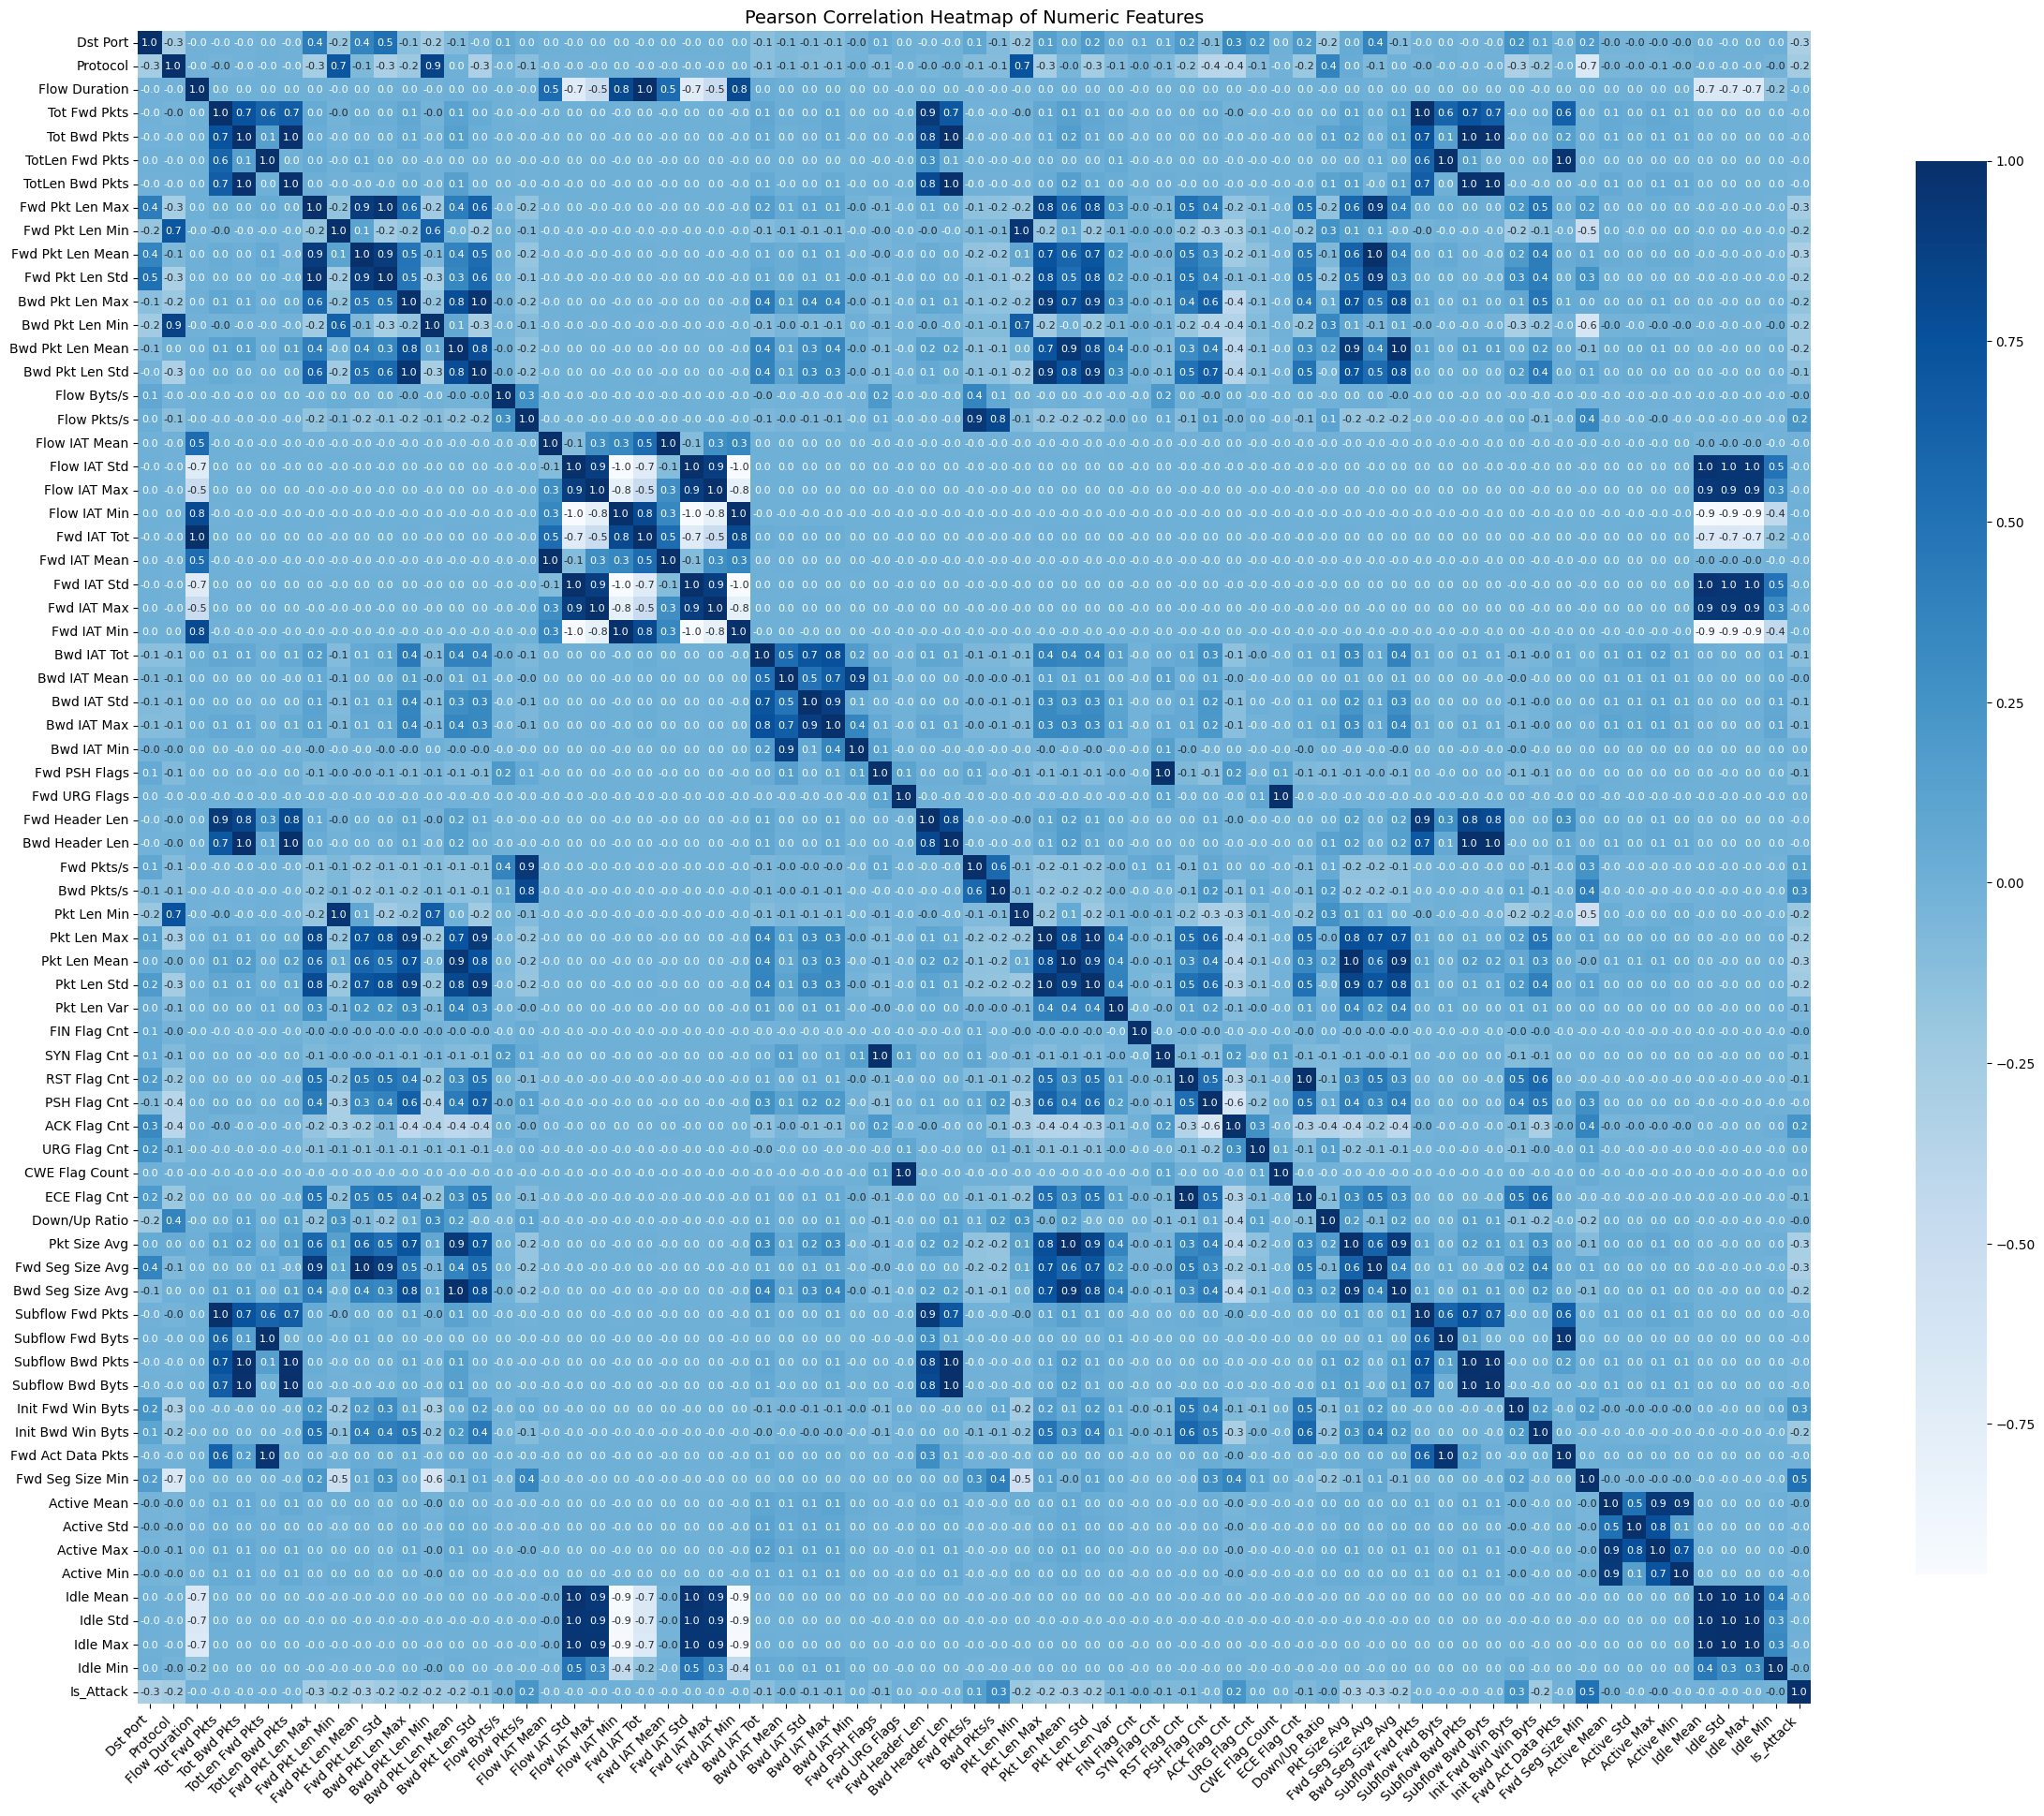

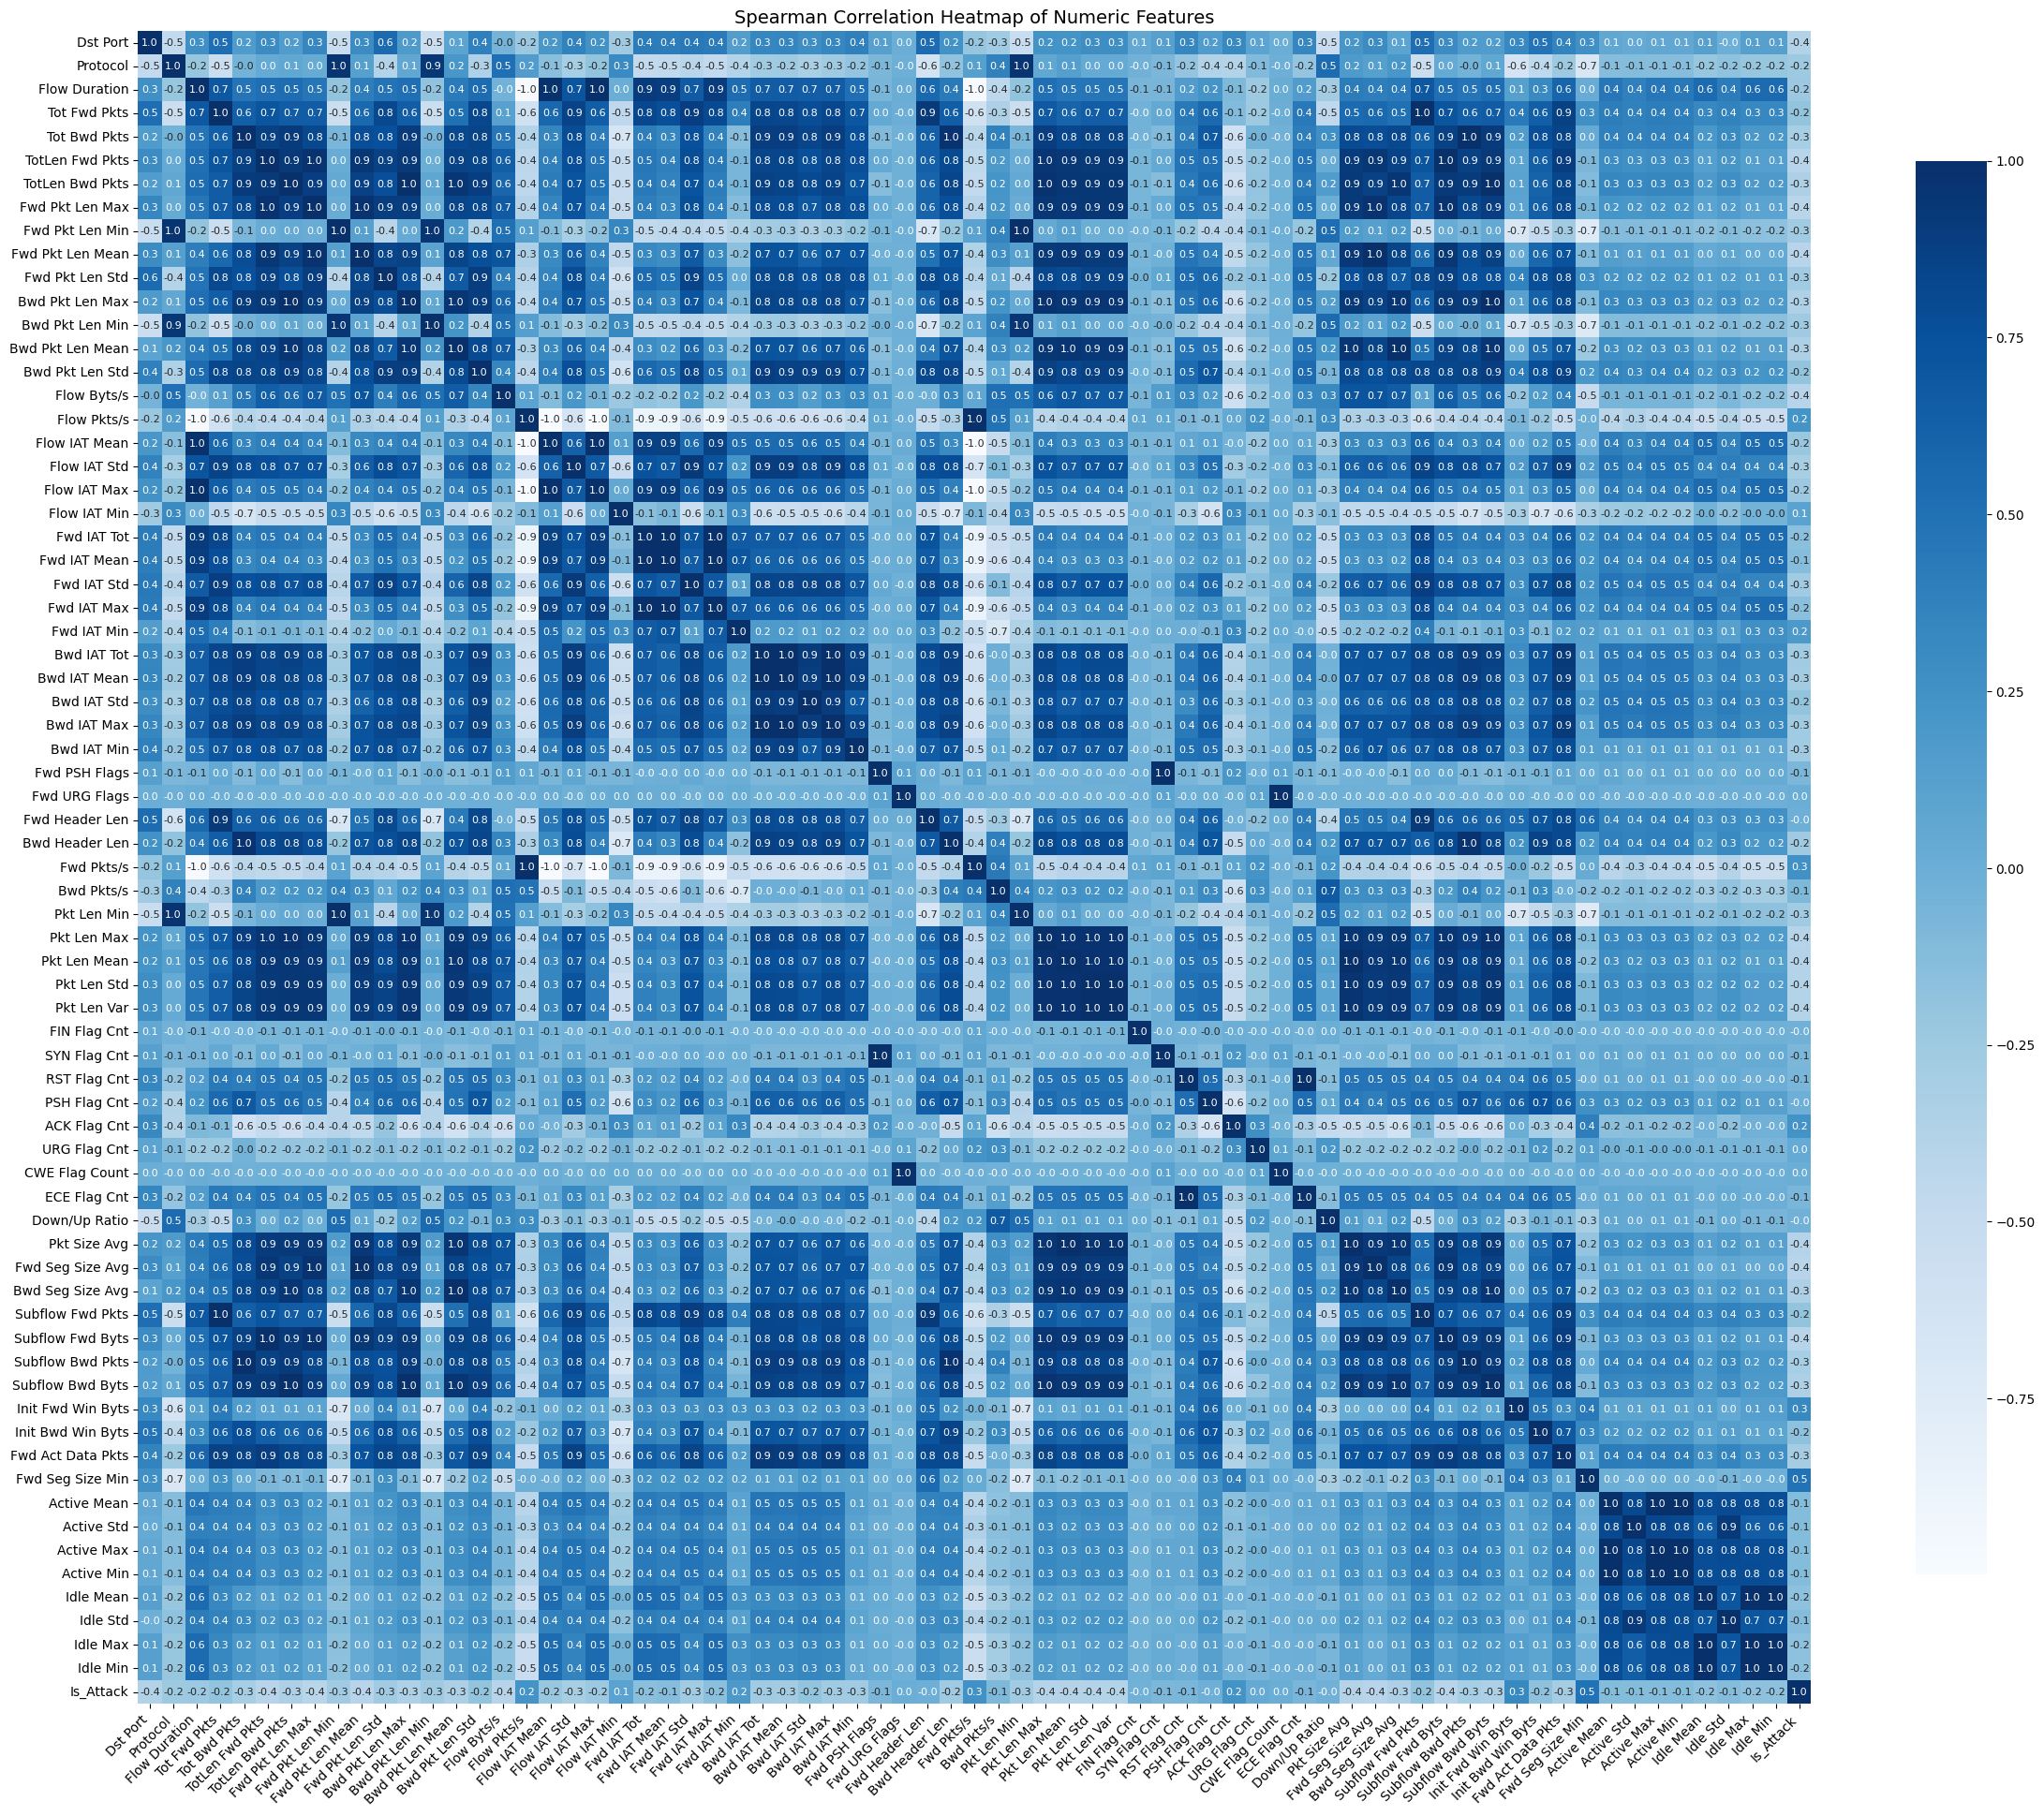

In [29]:
numeric_cols = [col for col, dtype in cse.schema.items() if pl.Int64 == dtype or pl.Float64 == dtype or pl.Int32 == dtype]
numeric_data = cse.select(numeric_cols).to_pandas()

pearson_corr_matrix = numeric_data.corr(method="pearson")
plot_correlation_matrix(pearson_corr_matrix, "Pearson Correlation Heatmap of Numeric Features", "pearson_correlation_heatmap_hd.png")

spearman_corr_matrix = numeric_data.corr(method="spearman")
plot_correlation_matrix(spearman_corr_matrix, "Spearman Correlation Heatmap of Numeric Features", "spearman_correlation_heatmap_hd.png")

### Análise desconsiderando categóricos

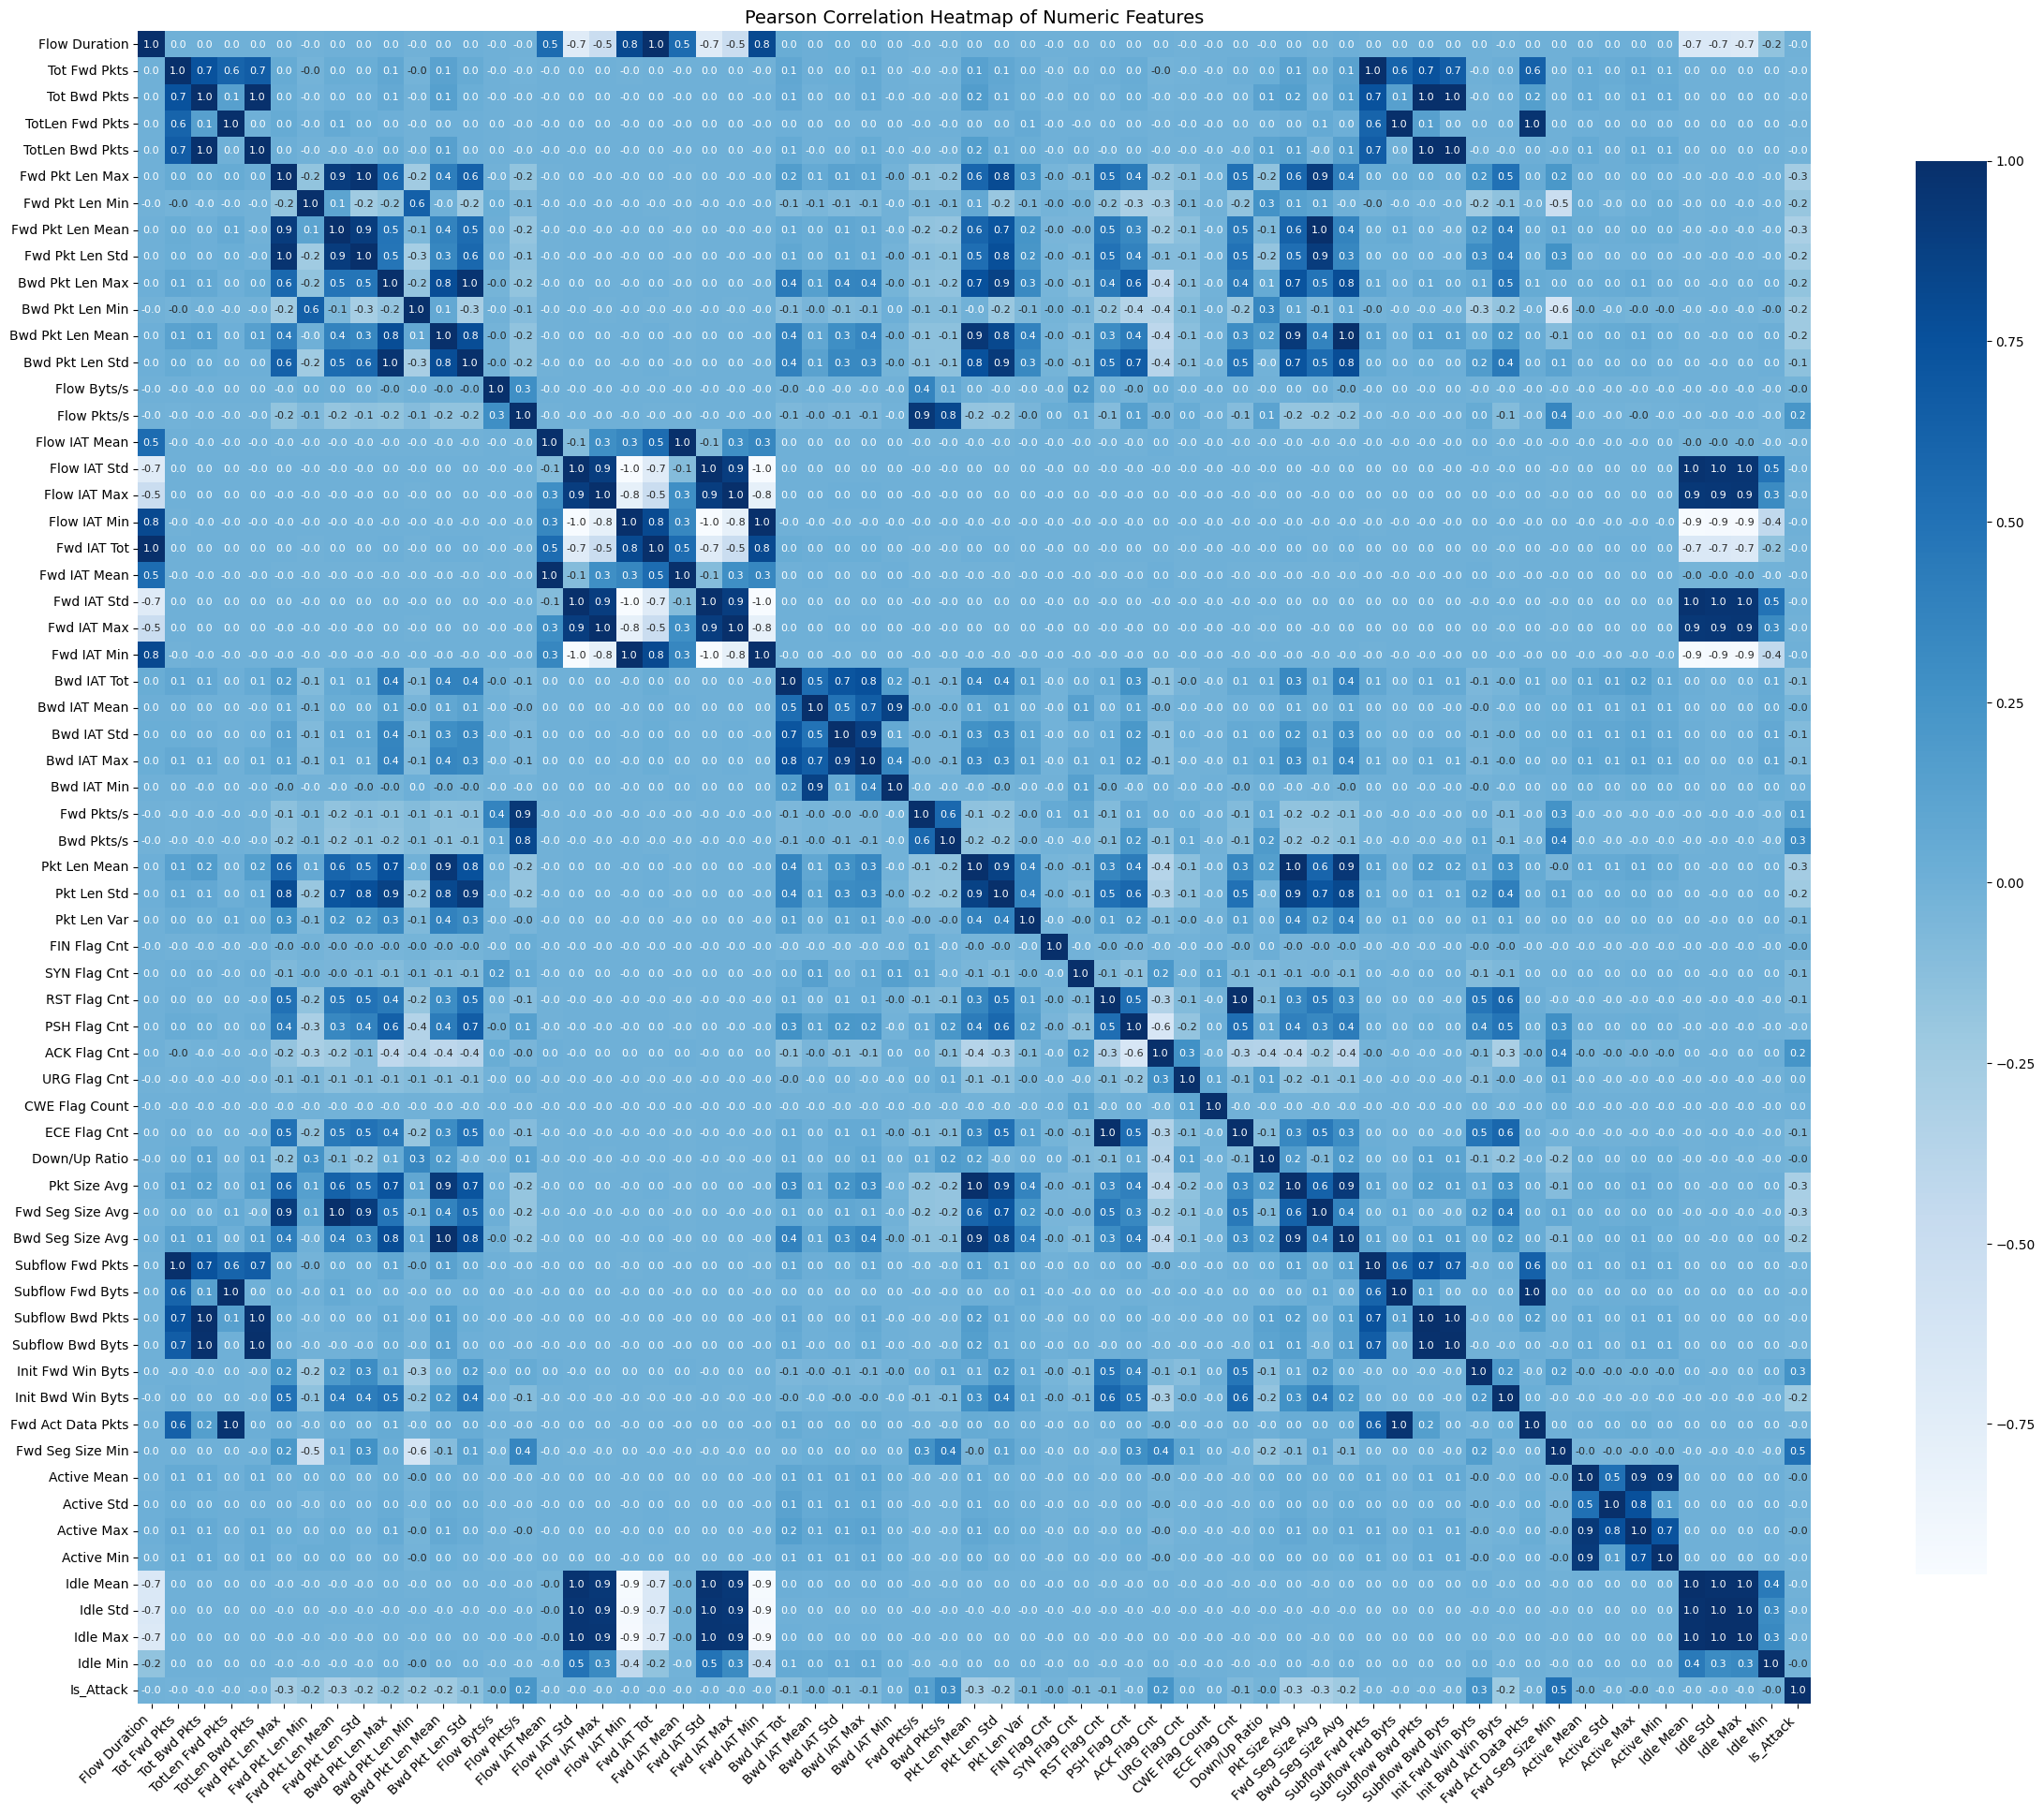

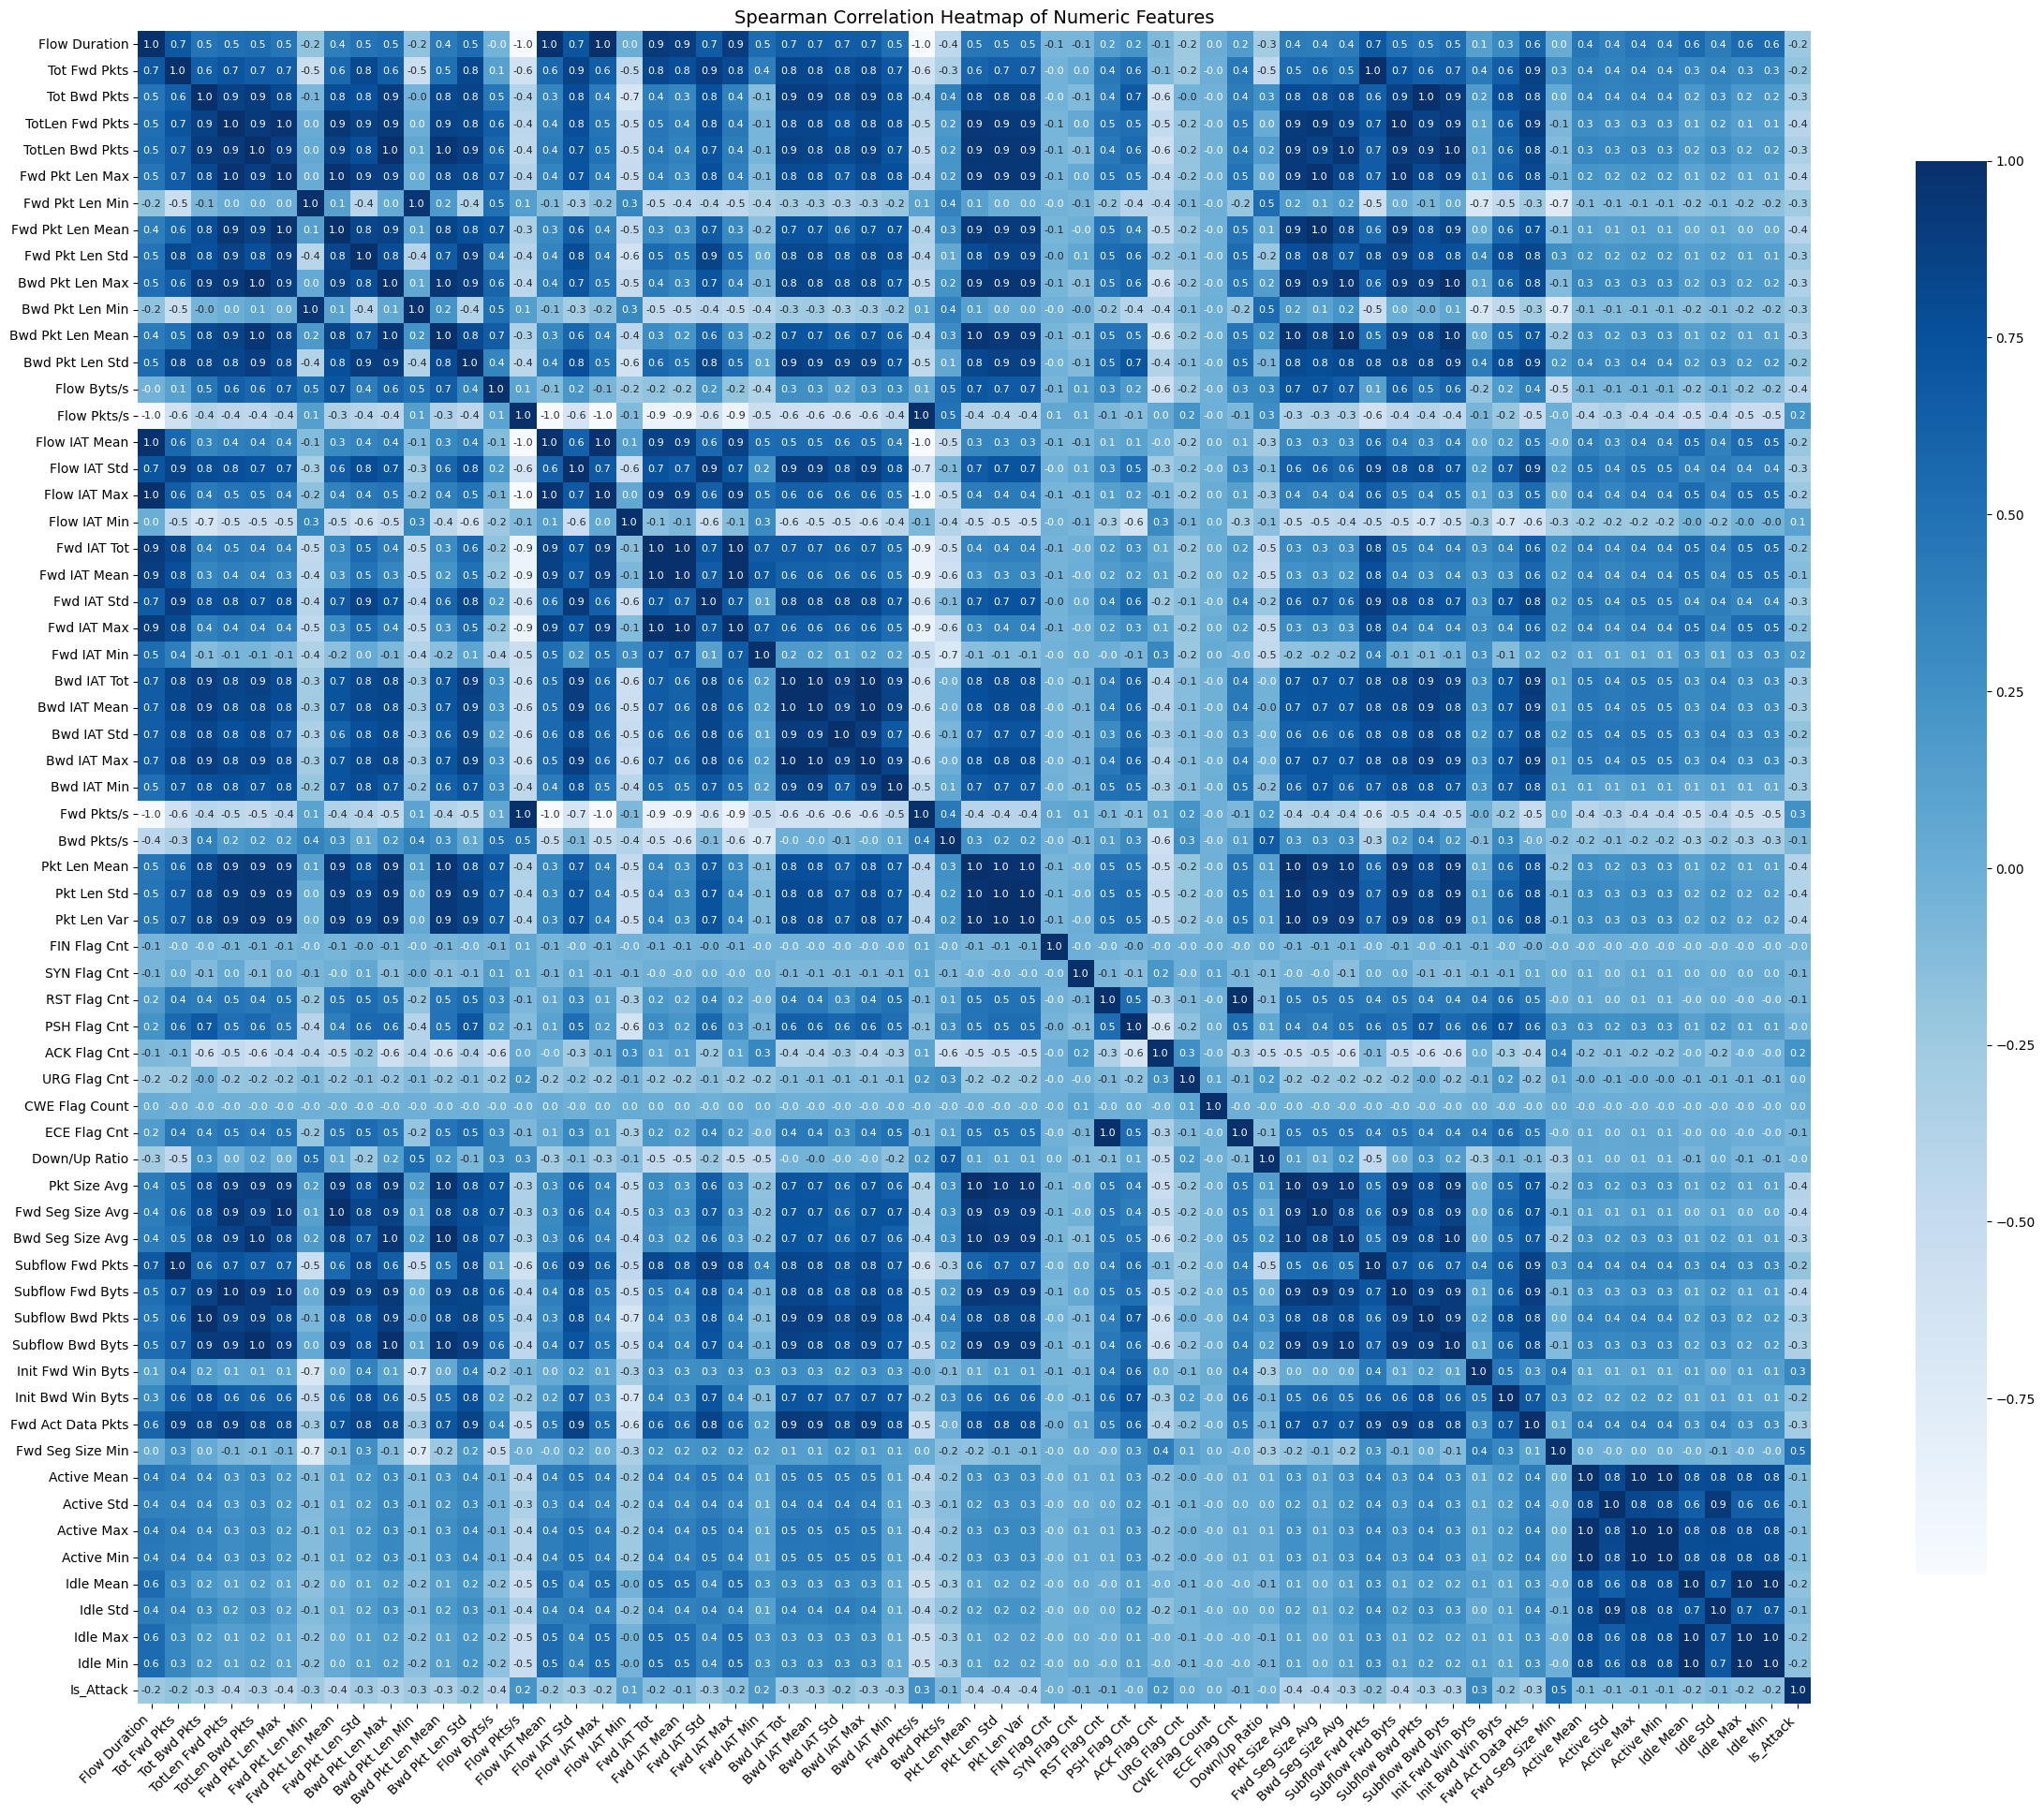

In [30]:
categorical_cols = ['Dst Port', 'Protocol', 'Fwd PSH Flags', 'Fwd URG Flags', 'Fwd Header Len', 
                    'Bwd Header Len', 'Pkt Len Min', 'Pkt Len Max']
numeric_data_NC = cse.select(numeric_cols).to_pandas()

numeric_data_NC = numeric_data_NC.drop(columns=categorical_cols, errors='ignore')

pearson_corr_matrix_NC = numeric_data_NC.corr(method="pearson")
plot_correlation_matrix(pearson_corr_matrix_NC, "Pearson Correlation Heatmap of Numeric Features", "pearson_correlation_heatmap_hd.png")

spearman_corr_matrix_NC = numeric_data_NC.corr(method="spearman")
plot_correlation_matrix(spearman_corr_matrix_NC, "Spearman Correlation Heatmap of Numeric Features", "spearman_correlation_heatmap_hd.png")

## Remoção de Variáveis Altamente Correlacionadas (desconsiderando categóricos)

In [31]:
correlation_threshold = 0.95

def remove_highly_correlated(corr_matrix, threshold):
    highly_correlated_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                highly_correlated_pairs.append((colname, corr_matrix.columns[j]))

    to_remove = set()
    for col1, col2 in highly_correlated_pairs:
        to_remove.add(col2)

    return to_remove

In [36]:
to_remove_pearson = remove_highly_correlated(pearson_corr_matrix_NC, correlation_threshold)
to_remove_spearman = remove_highly_correlated(spearman_corr_matrix_NC, correlation_threshold)

print("Colunas removidas por alta correlação (Pearson):", to_remove_pearson)
print("Colunas removidas por alta correlação (Spearman):", to_remove_spearman)

print("Número de colunas antes da remoção:", len(numeric_data_NC.columns))

print("Número de colunas após a remoção para Pearson:", len(numeric_data_NC.columns) - len(to_remove_pearson))
print("Número de colunas após a remoção para Spearman:", len(numeric_data_NC.columns) - len(to_remove_spearman))

Colunas removidas por alta correlação (Pearson): {'Flow IAT Mean', 'Subflow Bwd Pkts', 'Subflow Fwd Byts', 'Flow IAT Max', 'Fwd Pkt Len Mean', 'Pkt Len Mean', 'Fwd IAT Std', 'Flow IAT Min', 'Idle Std', 'Bwd Pkt Len Max', 'Fwd Pkt Len Max', 'Flow Duration', 'Bwd Pkt Len Mean', 'TotLen Bwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'Tot Fwd Pkts', 'Idle Mean', 'Flow IAT Std', 'RST Flag Cnt'}
Colunas removidas por alta correlação (Spearman): {'Pkt Len Var', 'Flow IAT Mean', 'Pkt Size Avg', 'Idle Max', 'Flow Pkts/s', 'Flow IAT Max', 'Fwd Pkt Len Mean', 'Pkt Len Mean', 'Fwd Pkt Len Min', 'Fwd IAT Tot', 'Bwd IAT Mean', 'Bwd Pkt Len Max', 'Active Max', 'Fwd Pkt Len Max', 'Flow Duration', 'Bwd Pkt Len Mean', 'Active Mean', 'TotLen Bwd Pkts', 'Tot Bwd Pkts', 'Pkt Len Std', 'Fwd IAT Mean', 'TotLen Fwd Pkts', 'Tot Fwd Pkts', 'Bwd Seg Size Avg', 'Bwd IAT Tot', 'Idle Mean', 'RST Flag Cnt'}
Número de colunas antes da remoção: 63
Número de colunas após a remoção para Pearson: 43
Número de colunas após

### Conclusões

Percebemos que Spearman detectou padrões que podem ser considerados "não lineares", a partir disso, poderiamos fazer uma intersecção dos dois métodos (? Talves. cabe avaliar)

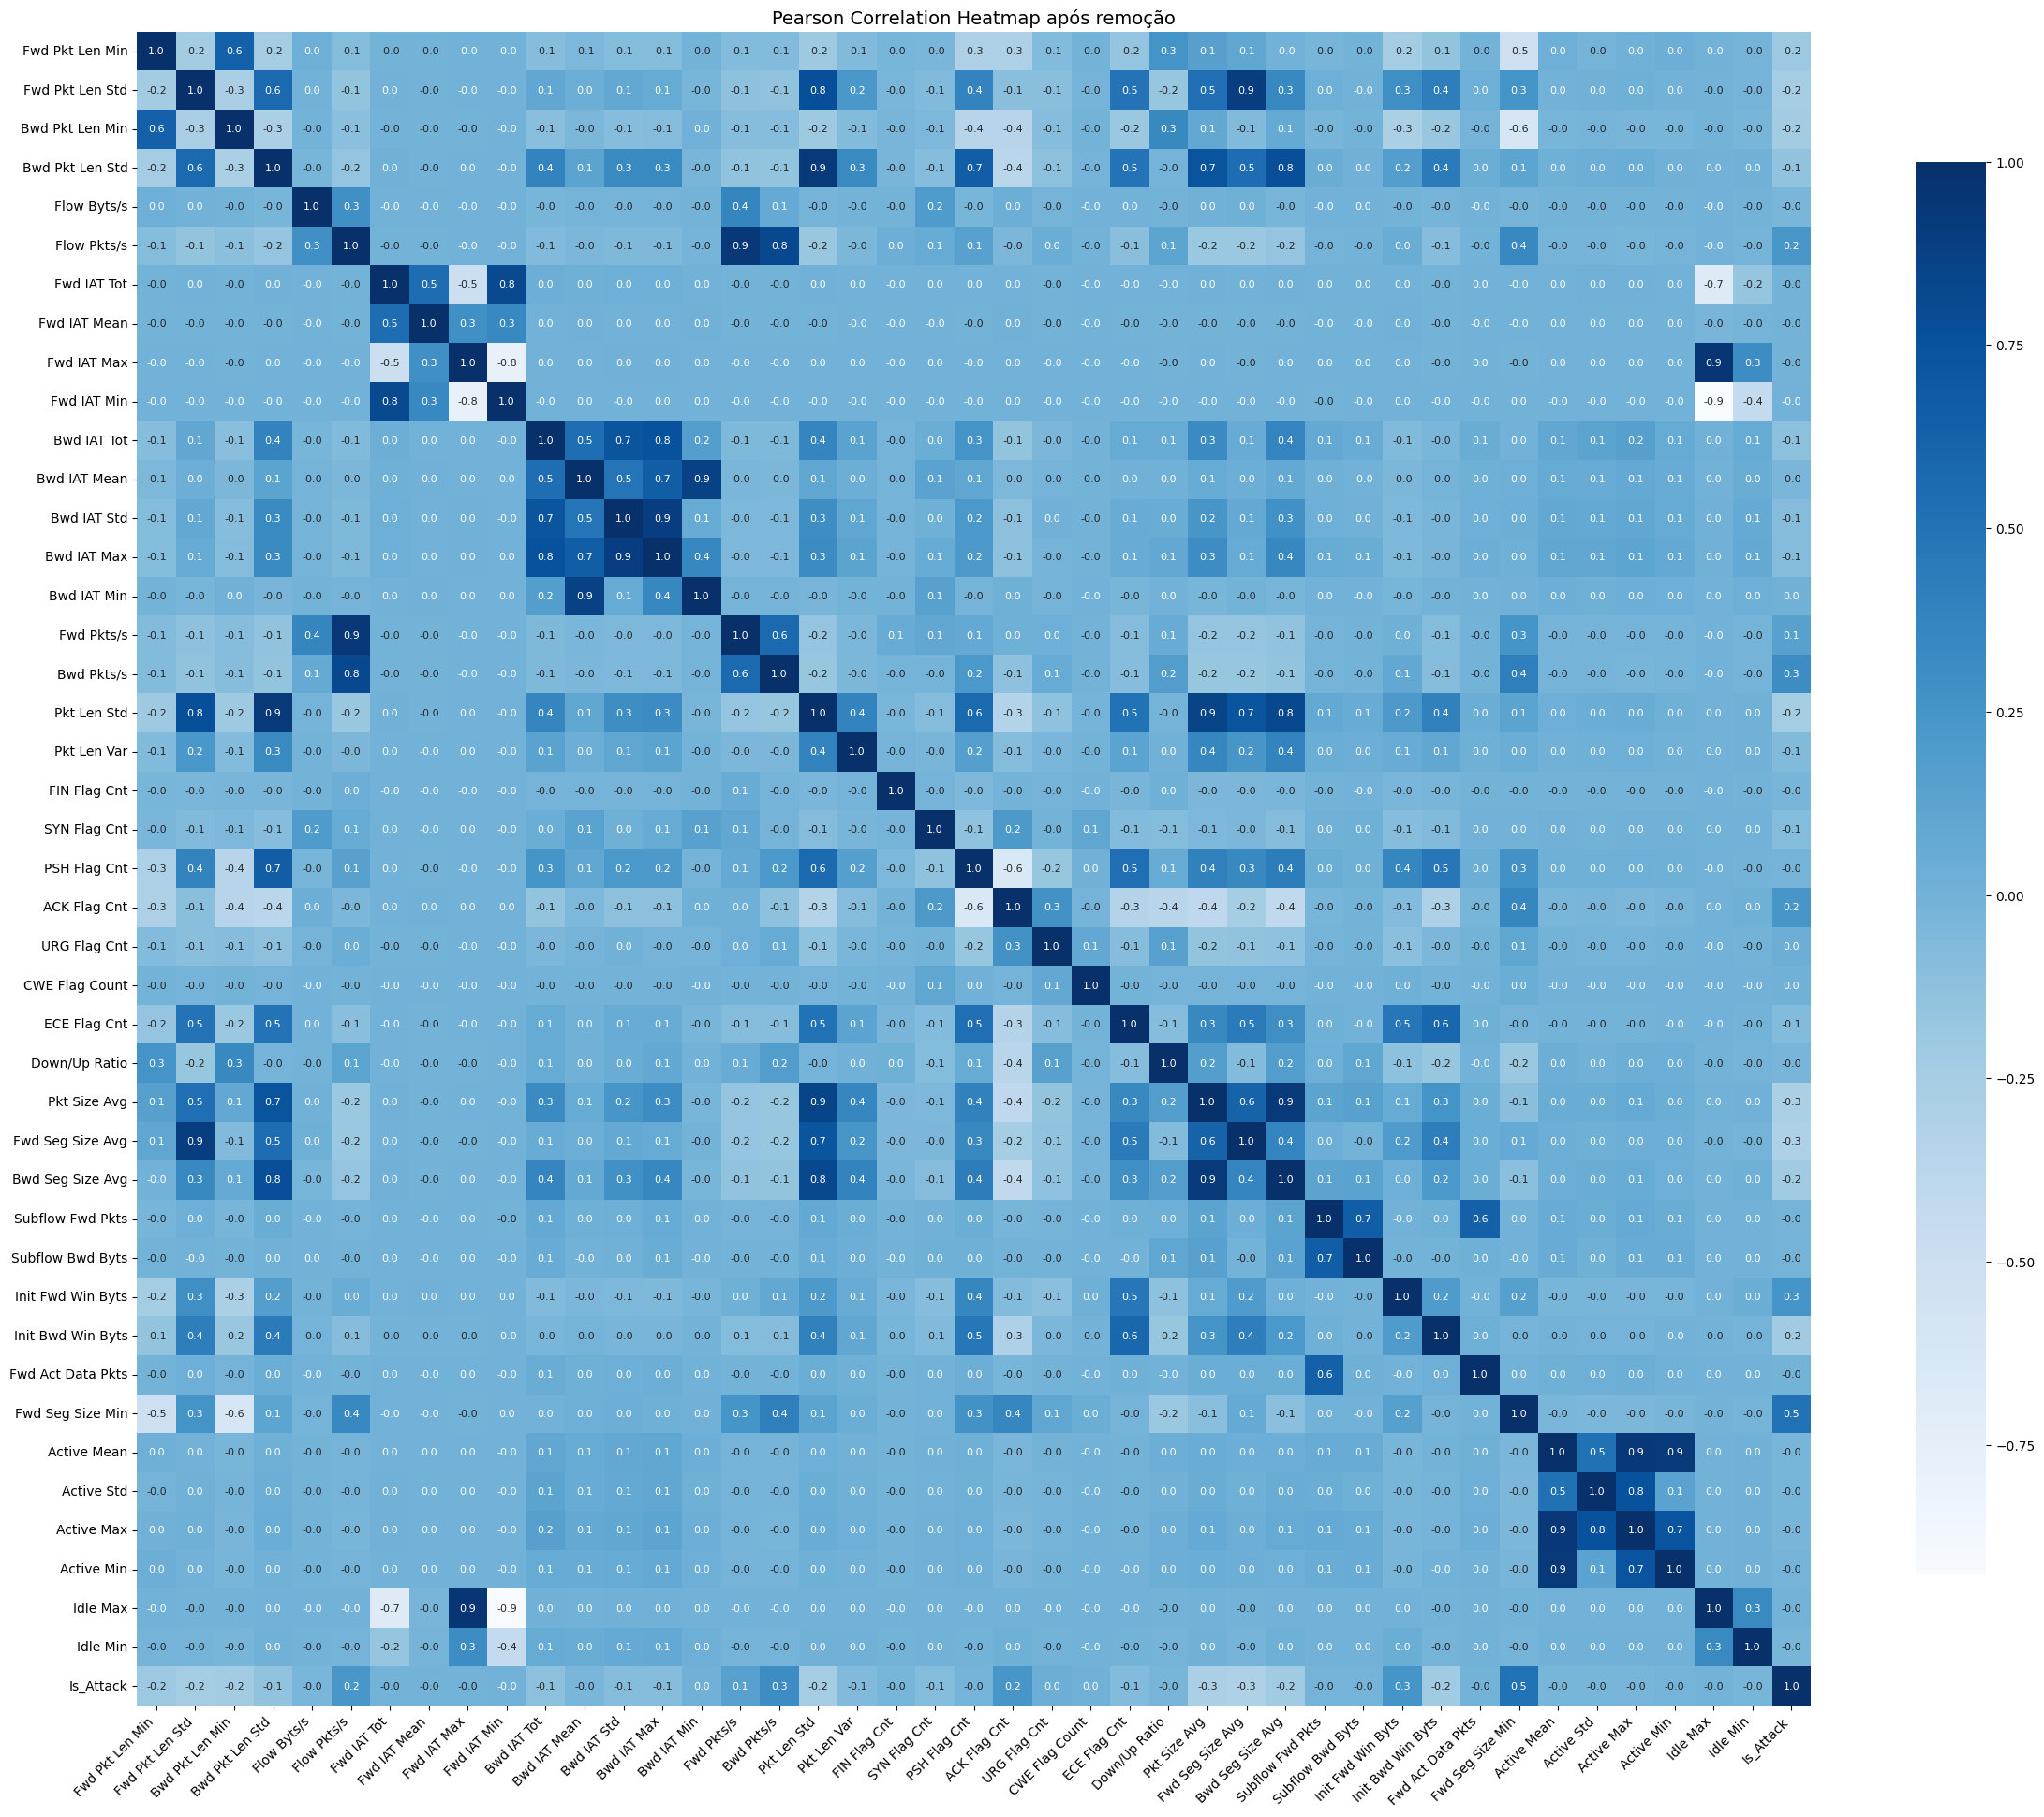

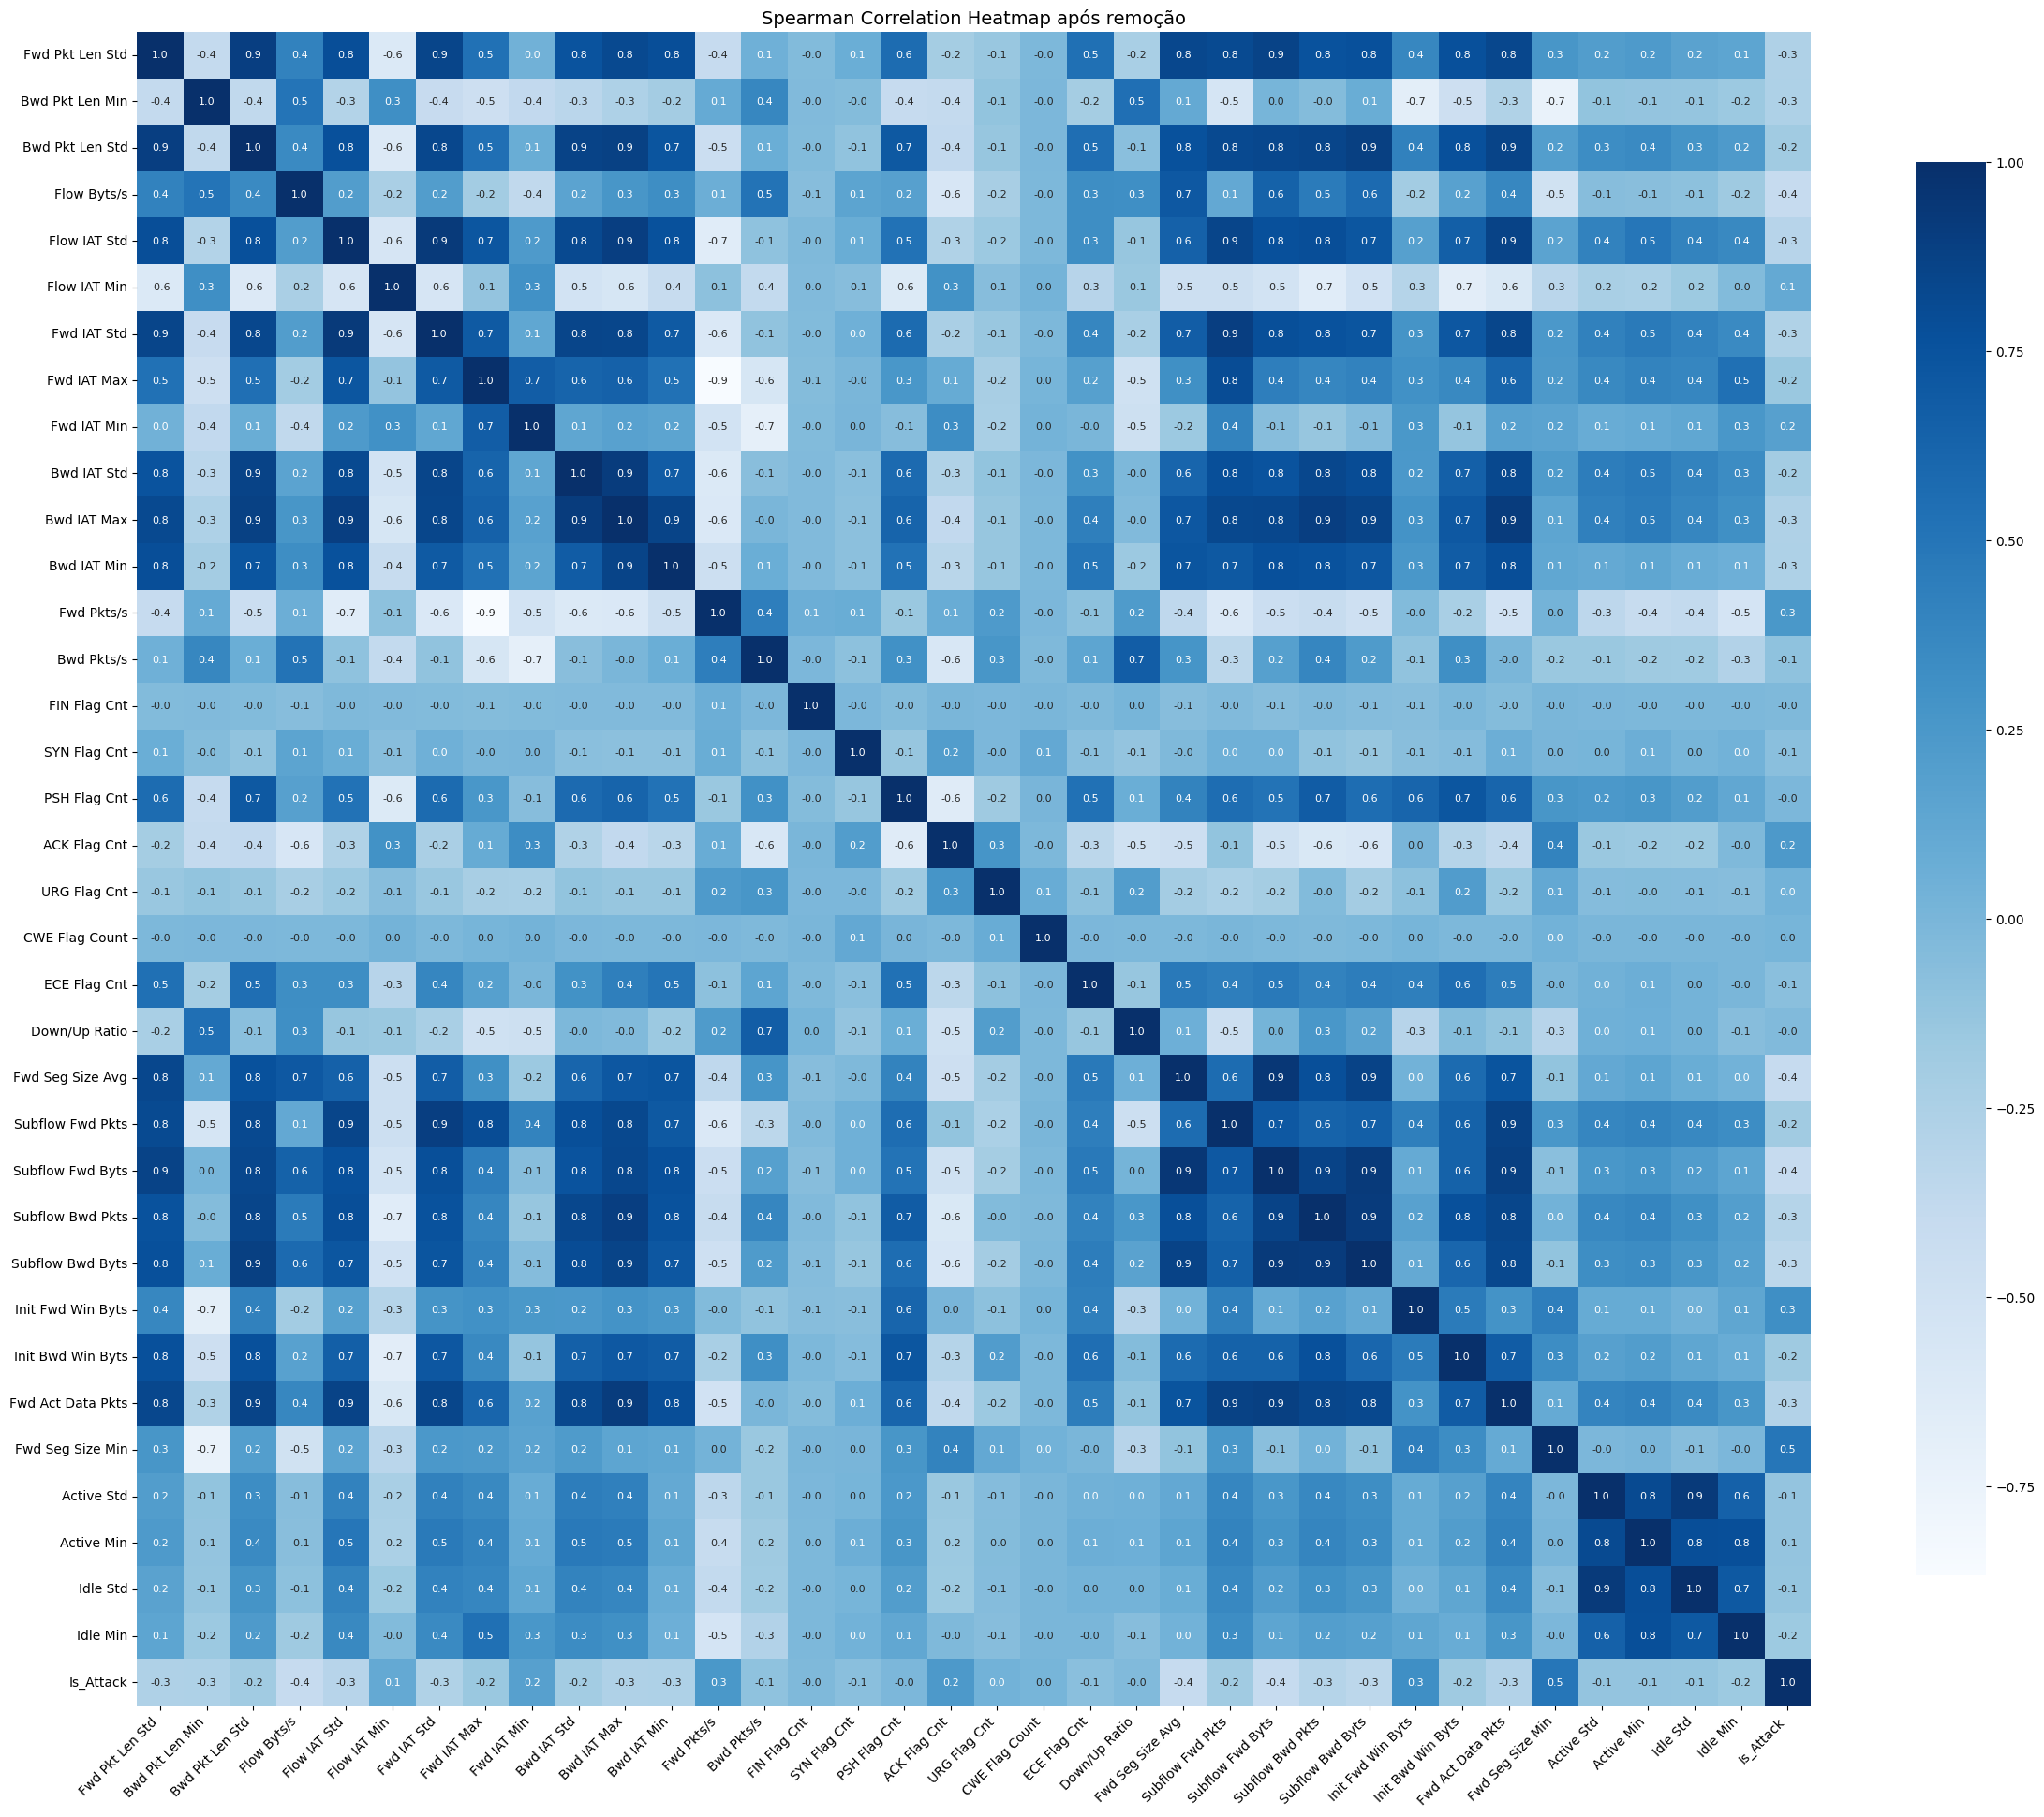

In [37]:
numeric_data_NC_pearson = numeric_data_NC.drop(columns=to_remove_pearson)
pearson_corr_matrix_final = numeric_data_NC_pearson.corr(method="pearson")
plot_correlation_matrix(pearson_corr_matrix_final, "Pearson Correlation Heatmap após remoção", "pearson_correlation_heatmap_final.png")

numeric_data_NC_spearman = numeric_data_NC.drop(columns=to_remove_spearman)
spearman_corr_matrix_final = numeric_data_NC_spearman.corr(method="spearman")
plot_correlation_matrix(spearman_corr_matrix_final, "Spearman Correlation Heatmap após remoção", "spearman_correlation_heatmap_final.png")

In [38]:
num_colunas = len(numeric_data_NC_spearman.columns)
print("Número de colunas:", num_colunas)

Número de colunas: 36


## Treinando árvore de decisão com spearman

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  # Importação adicionada
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = numeric_data_NC_spearman_del.drop(columns=['Is_Attack', 'Label'], errors='ignore')
y = numeric_data_NC_spearman_del['Is_Attack']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_dt))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_dt))

Matriz de Confusão:
[[1049461   14357]
 [  29136  344944]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98   1063818
           1       0.96      0.92      0.94    374080

    accuracy                           0.97   1437898
   macro avg       0.97      0.95      0.96   1437898
weighted avg       0.97      0.97      0.97   1437898



### teste com dados normalizados

In [44]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [45]:
dt_model_norm = DecisionTreeClassifier(random_state=42)
dt_model_norm.fit(X_train_norm, y_train)

y_pred_dt_norm = dt_model_norm.predict(X_test_norm)

print("=== Resultados com Normalização ===")
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_dt_norm))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_dt_norm))

=== Resultados com Normalização ===
Matriz de Confusão:
[[1049461   14357]
 [  29136  344944]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98   1063818
           1       0.96      0.92      0.94    374080

    accuracy                           0.97   1437898
   macro avg       0.97      0.95      0.96   1437898
weighted avg       0.97      0.97      0.97   1437898



## Utilizar a árvore de decisão para avaliar as features mais importantes

Top 15 Features Mais Importantes:
              Feature  Importance
27  Init Fwd Win Byts    0.509225
30   Fwd Seg Size Min    0.167150
11        Bwd IAT Min    0.160673
2     Bwd Pkt Len Std    0.098684
28  Init Bwd Win Byts    0.013895
3         Flow Byts/s    0.008708
12         Fwd Pkts/s    0.006078
13         Bwd Pkts/s    0.004561
10        Bwd IAT Max    0.004092
8         Fwd IAT Min    0.003037
4        Flow IAT Std    0.002801
7         Fwd IAT Max    0.002777
9         Bwd IAT Std    0.002762
6         Fwd IAT Std    0.002291
32         Active Min    0.001941


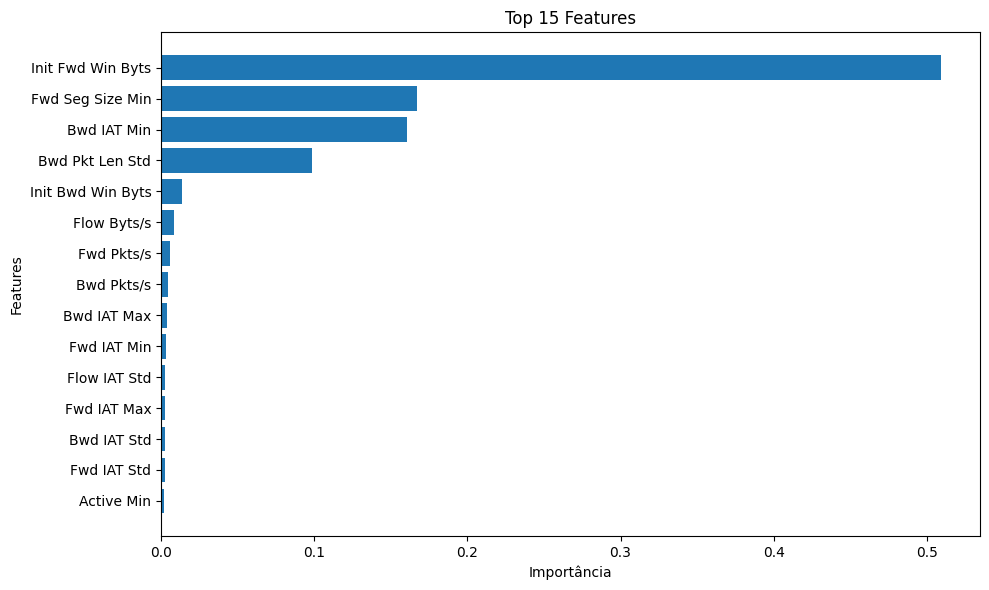

In [46]:
importances = dt_model.feature_importances_

feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

top_15_features = feature_importances.head(15)
print("Top 15 Features Mais Importantes:")
print(top_15_features)

plt.figure(figsize=(10, 6))
plt.barh(top_15_features['Feature'], top_15_features['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importância')
plt.ylabel('Features')
plt.title('Top 15 Features')
plt.tight_layout()
plt.show()

## Treinando árvore com Pearson

In [47]:
X_pearson = numeric_data_NC_pearson.drop(columns=['Is_Attack', 'Label'], errors='ignore')
y_pearson = numeric_data_NC_pearson['Is_Attack']

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_pearson, y_pearson, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_p = scaler.fit_transform(X_train_p)
X_test_p = scaler.transform(X_test_p)

dt_model_p = DecisionTreeClassifier(random_state=42)
dt_model_p.fit(X_train_p, y_train_p)

y_pred_p = dt_model_p.predict(X_test_p)

print("=== Resultados com Dados após Remoção baseada em Pearson ===")
print("Matriz de Confusão:")
print(confusion_matrix(y_test_p, y_pred_p))
print("\nRelatório de Classificação:")
print(classification_report(y_test_p, y_pred_p))

=== Resultados com Dados após Remoção baseada em Pearson ===
Matriz de Confusão:
[[1049581   14237]
 [  29078  345002]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98   1063818
           1       0.96      0.92      0.94    374080

    accuracy                           0.97   1437898
   macro avg       0.97      0.95      0.96   1437898
weighted avg       0.97      0.97      0.97   1437898



In [48]:
importances_p = dt_model_p.feature_importances_

feature_names_p = X_pearson.columns
feature_importances_p = pd.DataFrame({'Feature': feature_names_p, 'Importance': importances_p})

feature_importances_p = feature_importances_p.sort_values(by='Importance', ascending=False)

top_15_features_p = feature_importances_p.head(15)
print("Top 15 Features Mais Importantes (Pearson):")
print(top_15_features_p)

Top 15 Features Mais Importantes (Pearson):
              Feature  Importance
32  Init Fwd Win Byts    0.508302
35   Fwd Seg Size Min    0.167088
14        Bwd IAT Min    0.160246
3     Bwd Pkt Len Std    0.098347
33  Init Bwd Win Byts    0.013776
4         Flow Byts/s    0.007176
15         Fwd Pkts/s    0.004353
5         Flow Pkts/s    0.003826
16         Bwd Pkts/s    0.003290
9         Fwd IAT Min    0.002985
13        Bwd IAT Max    0.002798
7        Fwd IAT Mean    0.002608
10        Bwd IAT Tot    0.002465
8         Fwd IAT Max    0.002311
12        Bwd IAT Std    0.002243


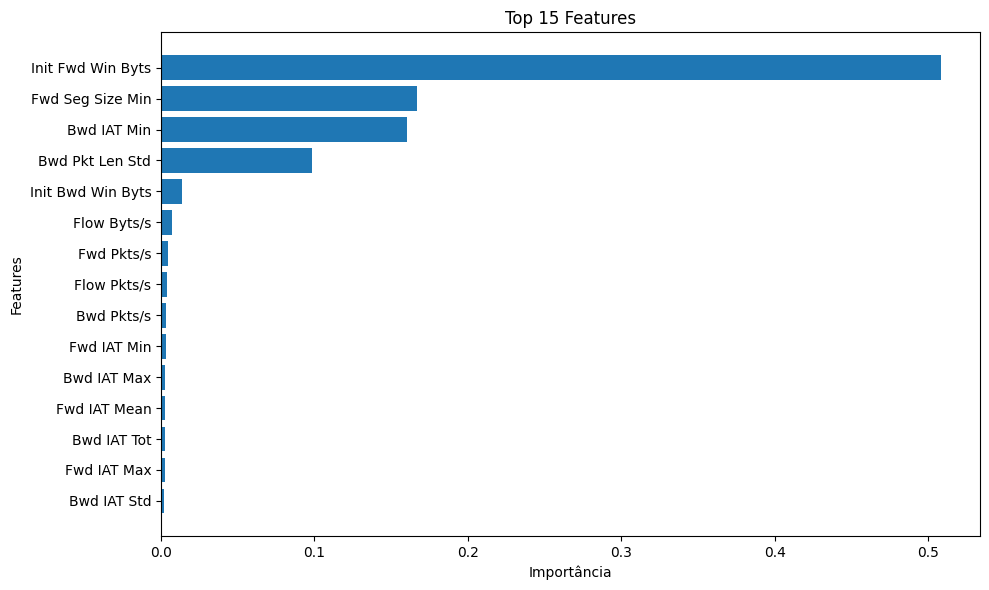

In [50]:
plt.figure(figsize=(10, 6))
plt.barh(top_15_features_p['Feature'], top_15_features_p['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importância')
plt.ylabel('Features')
plt.title('Top 15 Features')
plt.tight_layout()
plt.show()

## Abordagem utilizando união e intersecção

In [51]:
features_pearson = numeric_data_NC.columns.difference(to_remove_pearson)
features_spearman = numeric_data_NC.columns.difference(to_remove_spearman)

features_pearson = [feat for feat in features_pearson if feat not in ['Is_Attack', 'Label']]
features_spearman = [feat for feat in features_spearman if feat not in ['Is_Attack', 'Label']]

In [52]:
# Interseção das features
features_intersection = list(set(features_pearson).intersection(set(features_spearman)))

# União das features
features_union = list(set(features_pearson).union(set(features_spearman)))

### intersecção

In [53]:
# Criar o dataset com as features da interseção
X_intersection = numeric_data_NC[features_intersection]
y = numeric_data_NC['Is_Attack']

# Dividir os dados em treino e teste
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_intersection, y, test_size=0.2, random_state=42)

# Opcional: Normalizar os dados
scaler_i = StandardScaler()
X_train_i = scaler_i.fit_transform(X_train_i)
X_test_i = scaler_i.transform(X_test_i)

# Treinar o modelo
dt_model_i = DecisionTreeClassifier(random_state=42)
dt_model_i.fit(X_train_i, y_train_i)

# Fazer previsões
y_pred_i = dt_model_i.predict(X_test_i)

# Avaliar o modelo
print("=== Resultados com Interseção das Features ===")
print("Matriz de Confusão:")
print(confusion_matrix(y_test_i, y_pred_i))
print("\nRelatório de Classificação:")
print(classification_report(y_test_i, y_pred_i))

=== Resultados com Interseção das Features ===
Matriz de Confusão:
[[1049576   14242]
 [  29151  344929]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98   1063818
           1       0.96      0.92      0.94    374080

    accuracy                           0.97   1437898
   macro avg       0.97      0.95      0.96   1437898
weighted avg       0.97      0.97      0.97   1437898



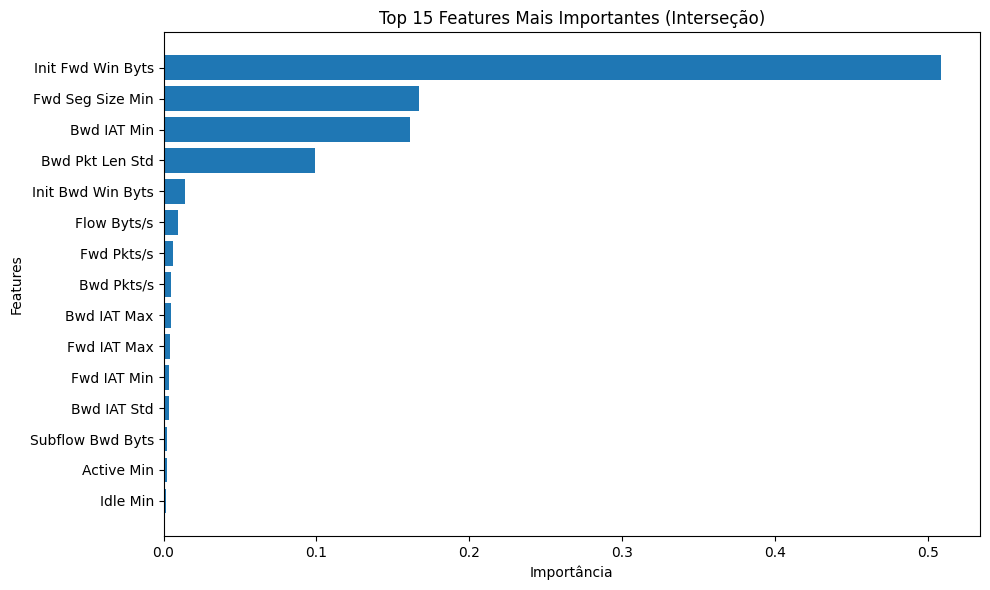

In [55]:
# Obter as importâncias das features
importances_i = dt_model_i.feature_importances_

# Criar um DataFrame
feature_importances_i = pd.DataFrame({'Feature': features_intersection, 'Importance': importances_i})

# Ordenar e selecionar as top 15
feature_importances_i = feature_importances_i.sort_values(by='Importance', ascending=False)
top_15_features_i = feature_importances_i.head(15)

# Plotar
plt.figure(figsize=(10, 6))
plt.barh(top_15_features_i['Feature'], top_15_features_i['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importância')
plt.ylabel('Features')
plt.title('Top 15 Features Mais Importantes (Interseção)')
plt.tight_layout()
plt.show()

### União

In [54]:
# Criar o dataset com as features da união
X_union = numeric_data_NC[features_union]

# Dividir os dados em treino e teste
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(X_union, y, test_size=0.2, random_state=42)

# Opcional: Normalizar os dados
scaler_u = StandardScaler()
X_train_u = scaler_u.fit_transform(X_train_u)
X_test_u = scaler_u.transform(X_test_u)

# Treinar o modelo
dt_model_u = DecisionTreeClassifier(random_state=42)
dt_model_u.fit(X_train_u, y_train_u)

# Fazer previsões
y_pred_u = dt_model_u.predict(X_test_u)

# Avaliar o modelo
print("=== Resultados com União das Features ===")
print("Matriz de Confusão:")
print(confusion_matrix(y_test_u, y_pred_u))
print("\nRelatório de Classificação:")
print(classification_report(y_test_u, y_pred_u))

=== Resultados com União das Features ===
Matriz de Confusão:
[[1049594   14224]
 [  28998  345082]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98   1063818
           1       0.96      0.92      0.94    374080

    accuracy                           0.97   1437898
   macro avg       0.97      0.95      0.96   1437898
weighted avg       0.97      0.97      0.97   1437898



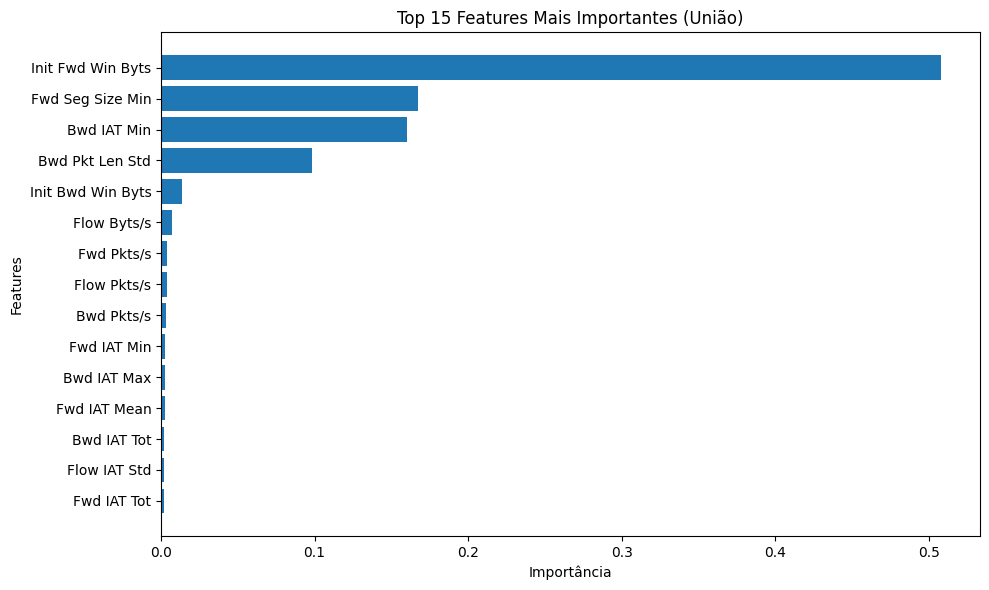

In [56]:
# Obter as importâncias das features
importances_u = dt_model_u.feature_importances_

# Criar um DataFrame
feature_importances_u = pd.DataFrame({'Feature': features_union, 'Importance': importances_u})

# Ordenar e selecionar as top 15
feature_importances_u = feature_importances_u.sort_values(by='Importance', ascending=False)
top_15_features_u = feature_importances_u.head(15)

# Plotar
plt.figure(figsize=(10, 6))
plt.barh(top_15_features_u['Feature'], top_15_features_u['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importância')
plt.ylabel('Features')
plt.title('Top 15 Features Mais Importantes (União)')
plt.tight_layout()
plt.show()

## Validações cruzadas

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [58]:
def cross_validate_model(X, y, model_name):
    # Normalizar os dados (opcional)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Definir o modelo
    dt_model = DecisionTreeClassifier(random_state=42)
    
    # Definir a validação cruzada K-Fold estratificada
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Executar a validação cruzada
    cv_scores = cross_val_score(dt_model, X_scaled, y, cv=skf, scoring='accuracy')
    
    # Imprimir os resultados
    print(f"=== Resultados da Validação Cruzada ({model_name}) ===")
    print(f"Acurácias em cada fold: {cv_scores}")
    print(f"Acurácia Média: {cv_scores.mean():.4f}")
    print(f"Desvio Padrão: {cv_scores.std():.4f}\n")

In [60]:
X_original = numeric_data_NC.drop(columns=['Is_Attack', 'Label'], errors='ignore')
y = numeric_data_NC['Is_Attack']

cross_validate_model(X_original, y, "Dados Originais")

=== Resultados da Validação Cruzada (Dados Originais) ===
Acurácias em cada fold: [0.96999648 0.969856   0.96994291 0.96999159 0.9698365 ]
Acurácia Média: 0.9699
Desvio Padrão: 0.0001



In [61]:
X_pearson = numeric_data_NC_pearson.drop(columns=['Is_Attack', 'Label'], errors='ignore')

cross_validate_model(X_pearson, y, "Remoção baseada em Pearson")

=== Resultados da Validação Cruzada (Remoção baseada em Pearson) ===
Acurácias em cada fold: [0.97000552 0.96995893 0.96990675 0.96998325 0.96976557]
Acurácia Média: 0.9699
Desvio Padrão: 0.0001



In [62]:
X_spearman = numeric_data_NC_spearman.drop(columns=['Is_Attack', 'Label'], errors='ignore')

cross_validate_model(X_spearman, y, "Remoção baseada em Spearman")

=== Resultados da Validação Cruzada (Remoção baseada em Spearman) ===
Acurácias em cada fold: [0.9699012  0.96978089 0.96994986 0.96998464 0.9698372 ]
Acurácia Média: 0.9699
Desvio Padrão: 0.0001



In [63]:
features_intersection = list(set(X_pearson.columns).intersection(set(X_spearman.columns)))

X_intersection = numeric_data_NC[features_intersection]

cross_validate_model(X_intersection, y, "Interseção das Features")

=== Resultados da Validação Cruzada (Interseção das Features) ===
Acurácias em cada fold: [0.96987408 0.96980871 0.9699596  0.97000759 0.96999298]
Acurácia Média: 0.9699
Desvio Padrão: 0.0001



In [64]:
features_union = list(set(X_pearson.columns).union(set(X_spearman.columns)))

X_union = numeric_data_NC[features_union]

cross_validate_model(X_union, y, "União das Features")

=== Resultados da Validação Cruzada (União das Features) ===
Acurácias em cada fold: [0.97010775 0.96994641 0.96996099 0.96996934 0.96981703]
Acurácia Média: 0.9700
Desvio Padrão: 0.0001



In [65]:
def cross_validate_model_multiple_metrics(X, y, model_name):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    dt_model = DecisionTreeClassifier(random_state=42)
    
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    scoring = ['accuracy', 'precision', 'recall', 'f1']
    
    cv_results = cross_validate(dt_model, X_scaled, y, cv=skf, scoring=scoring)
    
    print(f"=== Resultados da Validação Cruzada ({model_name}) ===")
    for metric in scoring:
        scores = cv_results['test_' + metric]
        print(f"{metric.capitalize()} em cada fold: {scores}")
        print(f"{metric.capitalize()} Média: {scores.mean():.4f}")
        print(f"Desvio Padrão: {scores.std():.4f}\n")

In [ ]:
results = []

def cross_validate_model_collect_results(X, y, model_name):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    dt_model = DecisionTreeClassifier(random_state=42)
    
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scoring = ['accuracy', 'precision', 'recall', 'f1']
    cv_results = cross_validate(dt_model, X_scaled, y, cv=skf, scoring=scoring)
    
    mean_accuracy = cv_results['test_accuracy'].mean()
    mean_precision = cv_results['test_precision'].mean()
    mean_recall = cv_results['test_recall'].mean()
    mean_f1 = cv_results['test_f1'].mean()
    
    results.append({
        'Modelo': model_name,
        'Acurácia': mean_accuracy,
        'Precisão': mean_precision,
        'Recall': mean_recall,
        'F1-Score': mean_f1
    })

cross_validate_model_collect_results(X_original, y, "Dados Originais")
cross_validate_model_collect_results(X_pearson, y, "Remoção baseada em Pearson")
cross_validate_model_collect_results(X_spearman, y, "Remoção baseada em Spearman")
cross_validate_model_collect_results(X_intersection, y, "Interseção das Features")
cross_validate_model_collect_results(X_union, y, "União das Features")

results_df = pd.DataFrame(results)

print(results_df)

In [ ]:
X_original = numeric_data_NC.drop(columns=['Is_Attack', 'Label'], errors='ignore')
features_original = X_original.columns.tolist()
print(f"=== Dados Originais ===")
print(f"Número de Colunas: {len(features_original)}")
print(f"Colunas:\n{features_original}\n")

X_pearson = numeric_data_NC_pearson.drop(columns=['Is_Attack', 'Label'], errors='ignore')
features_pearson = X_pearson.columns.tolist()
print(f"=== Remoção baseada em Pearson ===")
print(f"Número de Colunas: {len(features_pearson)}")
print(f"Colunas:\n{features_pearson}\n")

X_spearman = numeric_data_NC_spearman.drop(columns=['Is_Attack', 'Label'], errors='ignore')
features_spearman = X_spearman.columns.tolist()
print(f"=== Remoção baseada em Spearman ===")
print(f"Número de Colunas: {len(features_spearman)}")
print(f"Colunas:\n{features_spearman}\n")

features_intersection = list(set(features_pearson).intersection(set(features_spearman)))
features_intersection.sort()
print(f"=== Interseção das Features ===")
print(f"Número de Colunas: {len(features_intersection)}")
print(f"Colunas:\n{features_intersection}\n")

features_union = list(set(features_pearson).union(set(features_spearman)))
features_union.sort()
print(f"=== União das Features ===")
print(f"Número de Colunas: {len(features_union)}")
print(f"Colunas:\n{features_union}\n")